In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
import copy

import random
from sklearn.model_selection import train_test_split
import seaborn as sns;
from sklearn.preprocessing import scale

In [10]:
data = pd.read_csv( 'Data_Files/epl-training.csv',index_col=0)
data = data.dropna(axis=1, how='all')

In [11]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HC,AC,HY,AY,HR,AR,Unnamed: 70,Unnamed: 71,Unnamed: 72
Date,,,,,,,,,,,,,,,,,,,,,
16/08/08,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,...,8,7,5,0,0,0,0,NaN,NaN,NaN
16/08/08,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,...,12,4,3,1,2,0,0,NaN,NaN,NaN
16/08/08,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,...,9,3,5,2,2,0,0,NaN,NaN,NaN
16/08/08,Hull,Fulham,2,1,H,1,1,D,P Walton,11,...,9,5,6,3,0,0,0,NaN,NaN,NaN
16/08/08,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,...,12,7,9,1,2,0,0,NaN,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 16/08/08 to 26/07/2020
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomeTeam     4560 non-null   object 
 1   AwayTeam     4560 non-null   object 
 2   FTHG         4560 non-null   int64  
 3   FTAG         4560 non-null   int64  
 4   FTR          4560 non-null   object 
 5   HTHG         4560 non-null   int64  
 6   HTAG         4560 non-null   int64  
 7   HTR          4560 non-null   object 
 8   Referee      4560 non-null   object 
 9   HS           4560 non-null   int64  
 10  AS           4560 non-null   int64  
 11  HST          4560 non-null   int64  
 12  AST          4560 non-null   int64  
 13  HF           4560 non-null   int64  
 14  AF           4560 non-null   int64  
 15  HC           4560 non-null   int64  
 16  AC           4560 non-null   int64  
 17  HY           4560 non-null   int64  
 18  AY           4560 non-null   int64  
 19

In [13]:
# dont know what is the point of column 70,71,72 yet. 
# As most of the values of them are null and not named & explanied
# For now assume they are meaningless and delete
data.loc[data['Unnamed: 70'].notnull()]

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HC,AC,HY,AY,HR,AR,Unnamed: 70,Unnamed: 71,Unnamed: 72
Date,,,,,,,,,,,,,,,,,,,,,
18/08/12,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,...,8,7,0,0,0,0,0,1.44,4.72,8.71
18/08/12,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,...,11,6,3,0,0,0,0,1.84,3.75,4.75
18/08/12,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,...,8,3,5,2,2,0,0,2.83,3.35,2.72
18/08/12,QPR,Swansea,0,5,A,0,1,A,L Probert,20,...,14,5,3,2,2,0,0,2.00,3.53,4.15
18/08/12,Reading,Stoke,1,1,D,0,1,A,K Friend,9,...,14,4,3,2,4,0,1,2.47,3.30,3.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/05/13,Swansea,Fulham,0,3,A,0,1,A,L Mason,19,...,9,8,0,2,1,0,0,1.66,4.09,5.76
19/05/13,Tottenham,Sunderland,1,0,H,0,0,D,A Marriner,23,...,12,14,1,1,3,0,1,1.25,6.60,15.00
19/05/13,West Brom,Man United,5,5,D,1,3,A,M Oliver,15,...,6,3,5,0,1,0,0,3.65,3.42,2.17


In [14]:
del data['Unnamed: 70']
del data['Unnamed: 71']
del data['Unnamed: 72']

In [15]:
data.isnull().values.any()

False

In [16]:
# Think about how to use referee as prior
data['Referee'].value_counts().head(10) 

M Dean           349
M Atkinson       336
A Marriner       298
M Oliver         266
A Taylor         258
L Mason          253
K Friend         229
J Moss           225
M Clattenburg    207
M Jones          202
Name: Referee, dtype: int64

In [17]:
#some team play more often
data['HomeTeam'].value_counts()

Tottenham           228
Man City            228
Everton             228
Chelsea             228
Man United          228
Liverpool           228
Arsenal             228
West Ham            209
Newcastle           190
Stoke               190
Sunderland          171
Aston Villa         171
West Brom           171
Southampton         152
Swansea             133
Crystal Palace      133
Fulham              133
Burnley             114
Leicester           114
Wigan                95
Hull                 95
Norwich              95
Watford              95
Wolves               95
Bournemouth          95
Bolton               76
Blackburn            76
Brighton             57
QPR                  57
Cardiff              38
Portsmouth           38
Huddersfield         38
Middlesbrough        38
Birmingham           38
Reading              19
Blackpool            19
Sheffield United     19
Name: HomeTeam, dtype: int64

In [18]:
# Total team number
hometeam = data['HomeTeam'].unique()
hometeam.size

37

In [19]:
data.index= pd.to_datetime(data.index)
data = data.sort_index()
data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-11,Chelsea,Sunderland,5,0,H,3,0,H,M Atkinson,17,...,11,0,5,11,4,0,0,1,0,0
2008-01-11,Everton,Fulham,1,0,H,0,0,D,L Mason,9,...,4,5,11,15,6,5,0,0,0,0
2008-01-11,Man United,Hull,4,3,H,3,1,H,M Dean,20,...,11,7,12,13,9,1,2,2,0,0
2008-01-11,Middlesbrough,West Ham,1,1,D,0,1,A,A Marriner,11,...,7,8,10,14,5,4,3,4,0,0
2008-01-11,Portsmouth,Wigan,1,2,A,0,1,A,P Walton,16,...,8,8,9,11,9,6,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,Aston Villa,Man City,1,6,A,0,4,A,J Moss,7,...,1,12,5,12,2,4,2,1,0,0
2020-12-07,Aston Villa,Crystal Palace,2,0,H,1,0,H,M Atkinson,12,...,9,5,21,21,5,1,2,4,0,1
2020-12-07,Bournemouth,Leicester,4,1,H,0,1,A,S Attwell,10,...,4,5,11,12,2,6,2,1,0,1


### Baseline

In [20]:
#accuracy of prediction 'all home team will win'
data['FTR'].value_counts()['H']/data.shape[0]

0.4611842105263158

In [21]:
#accuracy of prediction 'all away team will win'
data['FTR'].value_counts()['A']/data.shape[0]

0.2912280701754386

### Data preparation
#### Firstly, we simplify the problem to predicting the possibility of home team winning-a binary classification

In [45]:
def home_win(result):
    if result =='H': return 1
    elif result =='A': return 0
    else: return 2

In [46]:
team_history= data[['HomeTeam', 'AwayTeam', 'FTR','FTHG','FTAG']].copy()
team_history['FTR']= team_history['FTR'].apply(home_win)

In [47]:
team_history

,HomeTeam,AwayTeam,FTR,FTHG,FTAG
Date,,,,,
2008-01-11,Chelsea,Sunderland,1,5,0
2008-01-11,Everton,Fulham,1,1,0
2008-01-11,Man United,Hull,1,4,3
2008-01-11,Middlesbrough,West Ham,2,1,1
2008-01-11,Portsmouth,Wigan,0,1,2
...,...,...,...,...,...
2020-12-01,Aston Villa,Man City,0,1,6
2020-12-07,Aston Villa,Crystal Palace,1,2,0
2020-12-07,Bournemouth,Leicester,1,4,1


In [25]:
#'VG'-valid full time goal (home - away or away - home) per period of time
team_history['HVG'] = np.nan
team_history['AVG'] = np.nan
team_history['HHVG'] = np.nan
team_history['HAVG'] = np.nan

In [26]:
FULLTIME = 0
HALFTIME = 1
PERIOD = 380*7
def valid_goals_per_period(df,period,time_len):
    hometeam = df['HomeTeam'].unique()
    teams_goals = pd.DataFrame(index=df.index.values, columns=hometeam)
    if time_len==FULLTIME:
        hg = 'FTHG'
        ag = 'FTAG'
    elif time_len==HALFTIME:
        hg = 'HTHG'
        ag = 'HTAG'
    else:
        raise Exception("Sorry, time lenth should be FULLTIME or HALFTIME")
      
    for i in range(len(df)):
        
        teams_goals[df.iloc[i]['HomeTeam'] ][i] = df.iloc[i][hg] - df.iloc[i][ag]
        teams_goals[df.iloc[i]['AwayTeam']][i] = df.iloc[i][ag] - df.iloc[i][hg]
    
    teams_goals=teams_goals.fillna(0)
    
    for i in range (len(teams_goals)):
        if i%period!=0: 
            teams_goals.iloc[i] += teams_goals.iloc[i-1]

    return teams_goals

#'VG'-valid goal per period of time
def get_valid_full_goals(df,goalcount_df,time_len):
    if time_len==FULLTIME:
        hg = 'HVG'
        ag = 'AVG'
    elif time_len==HALFTIME:
        hg = 'HHVG'
        ag = 'HAVG'
    else:
        raise Exception("Sorry, time lenth should be FULLTIME or HALFTIME")
    for i in range(1,len(df)):
        df[hg].iloc[i]=goalcount_df[df['HomeTeam'].iloc[i]].iloc[i-1]
        df[ag].iloc[i]=goalcount_df[df['AwayTeam'].iloc[i]].iloc[i-1]
    

In [27]:
full_time_goal_count=valid_goals_per_period(data,PERIOD,FULLTIME)
half_time_goal_count=valid_goals_per_period(data,PERIOD,HALFTIME)
get_valid_full_goals(team_history,full_time_goal_count,FULLTIME)
get_valid_full_goals(team_history,half_time_goal_count,HALFTIME)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [28]:
#rate of shots on target by home and away team
#team_history['HTSR'] = data['HST']/data['HS']
#team_history['ATSR'] = data['AST']/data['AS']
#team_history

In [29]:
def period_win_score(df, period):
    hometeam = data['HomeTeam'].unique()
    teams_score = pd.DataFrame(index=df.index.values, columns=hometeam)
    
    for i in range(len(df)):    
        teams_score[df.iloc[i]['HomeTeam'] ][i] = (df.iloc[i]['FTR']=='H' and 2) or (df.iloc[i]['FTR']=='D' and 1) or 0 
        teams_score[df.iloc[i]['AwayTeam']][i] = (df.iloc[i]['FTR']=='A' and 2) or (df.iloc[i]['FTR']=='D' and 1) or 0
    teams_score = teams_score.fillna(0)
    
    for i in range (len(teams_score)):
        if i%period!=0: 
            teams_score.iloc[i] += teams_score.iloc[i-1]
    
    return teams_score

def get_win_score(df,winscore_df):
    for i in range(1,len(df)):
        df['HWS'].iloc[i]=winscore_df[df['HomeTeam'].iloc[i]].iloc[i-1]
        df['AWS'].iloc[i]=winscore_df[df['AwayTeam'].iloc[i]].iloc[i-1]

In [30]:
# home periodical (every 100 game here) win score 
team_history['HWS'] = np.nan
team_history['AWS'] = np.nan
teams_win_score = period_win_score(data,PERIOD)
get_win_score(team_history,teams_win_score)


In [31]:
team_history = team_history.fillna(0) 

In [32]:
team_history

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HVG,AVG,HHVG,HAVG,HWS,AWS
Date,,,,,,,,,,,
2008-01-11,Chelsea,Sunderland,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-11,Everton,Fulham,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-11,Man United,Hull,1,4,3,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-11,Middlesbrough,West Ham,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-11,Portsmouth,Wigan,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,Aston Villa,Man City,0,1,6,-71.0,288.0,-25.0,129.0,38.0,291.0
2020-12-07,Aston Villa,Crystal Palace,1,2,0,-76.0,-56.0,-29.0,-37.0,38.0,158.0
2020-12-07,Bournemouth,Leicester,1,4,1,-89.0,41.0,-43.0,-10.0,150.0,204.0


In [33]:
def match_results(df):
    teams = {}
    for i in df['HomeTeam'].unique():
        teams[i] = {}
    for i in range(len(df)):
        if df.iloc[i].FTR == 'H':
            teams[df.iloc[i].HomeTeam][i] = 1 
            teams[df.iloc[i].AwayTeam][i] = 0 
        elif df.iloc[i].FTR == 'A':
            teams[df.iloc[i].AwayTeam][i] = 1
            teams[df.iloc[i].HomeTeam][i] = 0
        else:
            teams[df.iloc[i].AwayTeam][i] = 0
            teams[df.iloc[i].HomeTeam][i] = 0
            
    for i in teams:
        teams[i] = pd.DataFrame.from_dict(teams[i],orient='index')
            
    return teams

def get_last3res(df):
    col = ['HR1','HR2','HR3','AR1','AR2','AR3','H3WR','A3WR']
    past3res = pd.DataFrame(index=df.index.values, columns=col)
    res = match_results(df)
    
    for i in range(38,len(df)):
        hr = res[df.iloc[i].HomeTeam].loc[:i].tail(4)
        ar = res[df.iloc[i].AwayTeam].loc[:i].tail(4)
        
        
        if hr.size==4:
            hr= hr.iloc[:3]
            past3res['HR1'].iloc[i]=hr.iloc[2][0]
            past3res['HR2'].iloc[i]=hr.iloc[1][0]
            past3res['HR3'].iloc[i]=hr.iloc[0][0]
            past3res['H3WR'].iloc[i]=len(hr[hr[0]==1])/3


        

        if ar.size==4:
            ar= ar.iloc[:3]
            past3res['AR1'].iloc[i]=ar.iloc[2][0]
            past3res['AR2'].iloc[i]=ar.iloc[1][0]
            past3res['AR3'].iloc[i]=ar.iloc[0][0]
            past3res['A3WR'].iloc[i]=len(ar[ar[0]==1])/3


    
    return past3res

res = get_last3res(data)
team_history = pd.concat([team_history, res], axis=1)

In [34]:
#There is not enough historical data so we are dropping the first 38 lines of data
team_history = team_history.iloc[38:]
team_history = team_history.fillna(0) 

In [35]:
def show_heatmap(df):
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    ax = sns.heatmap(df.corr(),annot=True,square=True, fmt=".2f")
    plt.show()

In [36]:
'''
The prepared data for training. (Eliminate HomeTeam, AwayTeam in traning data though)

Annotation:
HVG/AVG: Home/Away team fulltime valid goals 
= home/away fulltime goal - away/home fulltime goal. Resets every 100 match

HHVG/HAVG: Home/Away team halftime valid goals 
= home/away halftime goal - away/home halftime goal. Resets every 100 match

HTSR/ATSR: Home/Away shots or target rate

HWS/AWS: Home/Away team winning score. 
Resets every 100 match. Calculated by the following rule:
    Win-2
    D-1
    Lose-0
'''
team_history

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HVG,AVG,HHVG,HAVG,HWS,AWS,HR1,HR2,HR3,AR1,AR2,AR3,H3WR,A3WR
2008-08-16,Bolton,Stoke,1,3,1,3.0,0.0,0.0,-2.0,6.0,4.0,1,0,1,0,0,0,0.666667,0.000000
2008-08-16,Everton,Blackburn,0,2,3,2.0,-4.0,1.0,0.0,5.0,1.0,1,0,0,0,0,0,0.333333,0.000000
2008-08-16,Hull,Fulham,1,2,1,0.0,-2.0,-1.0,0.0,4.0,1.0,0,1,1,0,0,0,0.666667,0.000000
2008-08-16,Middlesbrough,Tottenham,1,2,1,0.0,2.0,-1.0,-2.0,3.0,4.0,0,1,0,1,0,1,0.333333,0.666667
2008-08-16,Sunderland,Liverpool,0,0,1,-7.0,5.0,-2.0,1.0,1.0,7.0,0,0,0,1,1,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,Aston Villa,Man City,0,1,6,-71.0,288.0,-25.0,129.0,38.0,291.0,0,0,0,1,1,0,0.000000,0.666667
2020-12-07,Aston Villa,Crystal Palace,1,2,0,-76.0,-56.0,-29.0,-37.0,38.0,158.0,0,0,0,0,0,0,0.000000,0.000000
2020-12-07,Bournemouth,Leicester,1,4,1,-89.0,41.0,-43.0,-10.0,150.0,204.0,0,0,0,0,1,0,0.000000,0.333333
2020-12-07,Wolves,Everton,1,3,0,9.0,0.0,-18.0,8.0,83.0,187.0,0,0,0,1,0,0,0.000000,0.333333


In [37]:
tt = team_history.drop(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG'],1, inplace=False)
tt

,FTR,HVG,AVG,HHVG,HAVG,HWS,AWS,HR1,HR2,HR3,AR1,AR2,AR3,H3WR,A3WR
2008-08-16,1,3.0,0.0,0.0,-2.0,6.0,4.0,1,0,1,0,0,0,0.666667,0.000000
2008-08-16,0,2.0,-4.0,1.0,0.0,5.0,1.0,1,0,0,0,0,0,0.333333,0.000000
2008-08-16,1,0.0,-2.0,-1.0,0.0,4.0,1.0,0,1,1,0,0,0,0.666667,0.000000
2008-08-16,1,0.0,2.0,-1.0,-2.0,3.0,4.0,0,1,0,1,0,1,0.333333,0.666667
2008-08-16,0,-7.0,5.0,-2.0,1.0,1.0,7.0,0,0,0,1,1,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,0,-71.0,288.0,-25.0,129.0,38.0,291.0,0,0,0,1,1,0,0.000000,0.666667
2020-12-07,1,-76.0,-56.0,-29.0,-37.0,38.0,158.0,0,0,0,0,0,0,0.000000,0.000000
2020-12-07,1,-89.0,41.0,-43.0,-10.0,150.0,204.0,0,0,0,0,1,0,0.000000,0.333333
2020-12-07,1,9.0,0.0,-18.0,8.0,83.0,187.0,0,0,0,1,0,0,0.000000,0.333333


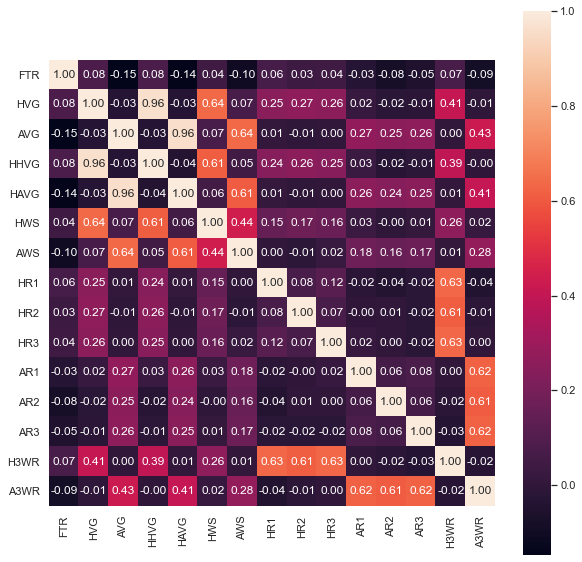

In [38]:
show_heatmap(tt)

In [39]:
x_all = tt.drop(['FTR','HHVG','HAVG'],1, inplace=False)
y_all = tt['FTR']

In [40]:
x_all

,HVG,AVG,HWS,AWS,HR1,HR2,HR3,AR1,AR2,AR3,H3WR,A3WR
2008-08-16,3.0,0.0,6.0,4.0,1,0,1,0,0,0,0.666667,0.000000
2008-08-16,2.0,-4.0,5.0,1.0,1,0,0,0,0,0,0.333333,0.000000
2008-08-16,0.0,-2.0,4.0,1.0,0,1,1,0,0,0,0.666667,0.000000
2008-08-16,0.0,2.0,3.0,4.0,0,1,0,1,0,1,0.333333,0.666667
2008-08-16,-7.0,5.0,1.0,7.0,0,0,0,1,1,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,-71.0,288.0,38.0,291.0,0,0,0,1,1,0,0.000000,0.666667
2020-12-07,-76.0,-56.0,38.0,158.0,0,0,0,0,0,0,0.000000,0.000000
2020-12-07,-89.0,41.0,150.0,204.0,0,0,0,0,1,0,0.000000,0.333333
2020-12-07,9.0,0.0,83.0,187.0,0,0,0,1,0,0,0.000000,0.333333


In [41]:
cols = [['HVG','AVG','HWS','AWS']]
for col in cols:
    x_all[col] = scale(x_all[col])

In [42]:
x_all

,HVG,AVG,HWS,AWS,HR1,HR2,HR3,AR1,AR2,AR3,H3WR,A3WR
2008-08-16,-0.152201,-0.196998,-1.150084,-1.176206,1,0,1,0,0,0,0.666667,0.000000
2008-08-16,-0.165618,-0.250618,-1.162193,-1.212556,1,0,0,0,0,0,0.333333,0.000000
2008-08-16,-0.192453,-0.223808,-1.174302,-1.212556,0,1,1,0,0,0,0.666667,0.000000
2008-08-16,-0.192453,-0.170188,-1.186410,-1.176206,0,1,0,1,0,1,0.333333,0.666667
2008-08-16,-0.286376,-0.129973,-1.210628,-1.139855,0,0,0,1,1,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,-1.145097,3.663626,-0.762603,2.301292,0,0,0,1,1,0,0.000000,0.666667
2020-12-07,-1.212185,-0.947675,-0.762603,0.689768,0,0,0,0,0,0,0.000000,0.000000
2020-12-07,-1.386612,0.352605,0.593579,1.247137,0,0,0,0,1,0,0.000000,0.333333
2020-12-07,-0.071696,-0.196998,-0.217709,1.041153,0,0,0,1,0,0,0.000000,0.333333


In [44]:
y_all==2

2008-08-16    False
2008-08-16    False
2008-08-16    False
2008-08-16    False
2008-08-16    False
              ...  
2020-12-01    False
2020-12-07    False
2020-12-07    False
2020-12-07    False
2020-12-07    False
Name: FTR, Length: 4522, dtype: bool

### Train


In [48]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all,test_size = 0.3,random_state = 2,stratify = y_all)

In [49]:
X_train.shape

(3165, 12)

In [50]:
from time import time
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    print("train time: {:.4f} second".format(end - start))
    
def predict_labels(clf, features, target):
    start = time()
    y_pred = clf.predict(features)
    end = time()
    print("prediction time: {:.4f} second".format(end - start))
    return f1_score(target, y_pred, pos_label=1), sum(target == y_pred) / float(len(y_pred))

def train_predict(clf, X_train, y_train, X_test, y_test):
    print("model: {}, sample size: {}。".format(clf.__class__.__name__, len(X_train)))
    train_classifier(clf, X_train, y_train)
    f1, acc = predict_labels(clf, X_train, y_train)
    print("f1 score: {:.4f} , accuracy {:.4f} on train set".format(f1 , acc))
    f1, acc = predict_labels(clf, X_test, y_test)
    print("f1 score: {:.4f} , accuracy {:.4f} on test set".format(f1 , acc))


In [51]:
clr1 = [
    LogisticRegression(penalty='l2', solver='newton-cg', multi_class='ovr',
                            C=0.1, warm_start=True),
    LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial',
                            C=0.4, warm_start=False),
    
    SVC(probability=True),
    SVC(C=0.3, class_weight=None, decision_function_shape='ovo', degree=1,
            kernel='rbf', probability=True, shrinking=True, tol=0.0005),
    SVC(C=0.28, class_weight=None, decision_function_shape='ovo', degree=1,
            kernel='rbf', probability=True, shrinking=True, tol=0.0002),
    xgb.XGBClassifier(seed = 42),
    xgb.XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=2,
            min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.7,
            scale_pos_weight=0.8, reg_alpha=1e-5, booster='gbtree'),
]

for classifier in clr1:
    train_predict(classifier, X_train, y_train, X_test, y_test)
    print('')

model: LogisticRegression, sample size: 3165。
train time: 0.0470 second
prediction time: 0.0023 second


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
clr2 = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    RandomForestClassifier(n_estimators = 200, random_state = 1, class_weight = 'balanced'),
    GaussianNB(),
    GradientBoostingClassifier(),
    LinearSVC(),
    SGDClassifier()
]
for classifier in clr2:
    train_predict(classifier, X_train, y_train, X_test, y_test)
    print('')

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

'''

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Conv1D
from keras.layers.core import Dense
from keras.optimizers import Adam

In [56]:
model = Sequential([
    Dense(units=16, input_shape=(12,), activation='sigmoid'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=3, activation='softmax')
])
model.save_weights('model.h5') #saving model with inital weights to tune hyperparameters
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
history = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=64, 
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
50/50 - 0s - loss: 1.0794 - accuracy: 0.4401
Epoch 2/100
50/50 - 0s - loss: 1.0666 - accuracy: 0.4616
Epoch 3/100
50/50 - 0s - loss: 1.0601 - accuracy: 0.4616
Epoch 4/100
50/50 - 0s - loss: 1.0565 - accuracy: 0.4616
Epoch 5/100
50/50 - 0s - loss: 1.0538 - accuracy: 0.4616
Epoch 6/100
50/50 - 0s - loss: 1.0514 - accuracy: 0.4616
Epoch 7/100
50/50 - 0s - loss: 1.0491 - accuracy: 0.4616
Epoch 8/100
50/50 - 0s - loss: 1.0465 - accuracy: 0.4616
Epoch 9/100
50/50 - 0s - loss: 1.0439 - accuracy: 0.4616
Epoch 10/100
50/50 - 0s - loss: 1.0410 - accuracy: 0.4616
Epoch 11/100
50/50 - 0s - loss: 1.0381 - accuracy: 0.4613
Epoch 12/100
50/50 - 0s - loss: 1.0349 - accuracy: 0.4626
Epoch 13/100
50/50 - 0s - loss: 1.0318 - accuracy: 0.4679
Epoch 14/100
50/50 - 0s - loss: 1.0284 - accuracy: 0.4730
Epoch 15/100
50/50 - 0s - loss: 1.0251 - accuracy: 0.4828
Epoch 16/100
50/50 - 0s - loss: 1.0216 - accuracy: 0.4882
Epoch 17/100
50/50 - 0s - loss: 1.0185 - accuracy: 0.4954
Epoch 18/100
50/50 - 0s

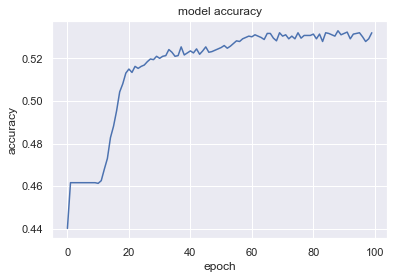

In [57]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [58]:
model.load_weights('model.h5') #resetting weights

In [59]:
history1 = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=32, 
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
99/99 - 0s - loss: 1.0696 - accuracy: 0.4509
Epoch 2/100
99/99 - 0s - loss: 1.0584 - accuracy: 0.4616
Epoch 3/100
99/99 - 0s - loss: 1.0553 - accuracy: 0.4616
Epoch 4/100
99/99 - 0s - loss: 1.0528 - accuracy: 0.4616
Epoch 5/100
99/99 - 0s - loss: 1.0504 - accuracy: 0.4616
Epoch 6/100
99/99 - 0s - loss: 1.0477 - accuracy: 0.4616
Epoch 7/100
99/99 - 0s - loss: 1.0447 - accuracy: 0.4616
Epoch 8/100
99/99 - 0s - loss: 1.0417 - accuracy: 0.4616
Epoch 9/100
99/99 - 0s - loss: 1.0383 - accuracy: 0.4626
Epoch 10/100
99/99 - 0s - loss: 1.0348 - accuracy: 0.4648
Epoch 11/100
99/99 - 0s - loss: 1.0309 - accuracy: 0.4717
Epoch 12/100
99/99 - 0s - loss: 1.0268 - accuracy: 0.4793
Epoch 13/100
99/99 - 0s - loss: 1.0227 - accuracy: 0.4891
Epoch 14/100
99/99 - 0s - loss: 1.0186 - accuracy: 0.4923
Epoch 15/100
99/99 - 0s - loss: 1.0146 - accuracy: 0.5027
Epoch 16/100
99/99 - 0s - loss: 1.0107 - accuracy: 0.5068
Epoch 17/100
99/99 - 0s - loss: 1.0069 - accuracy: 0.5093
Epoch 18/100
99/99 - 0s

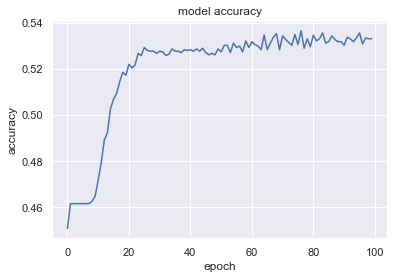

In [60]:
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show() 

In [61]:
# smaller batch size converges sooner but seems slightly less accurate
model.load_weights('model.h5') #resetting weights
history2 = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=128, 
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
25/25 - 0s - loss: 1.0848 - accuracy: 0.4130
Epoch 2/100
25/25 - 0s - loss: 1.0760 - accuracy: 0.4588
Epoch 3/100
25/25 - 0s - loss: 1.0700 - accuracy: 0.4619
Epoch 4/100
25/25 - 0s - loss: 1.0658 - accuracy: 0.4616
Epoch 5/100
25/25 - 0s - loss: 1.0632 - accuracy: 0.4616
Epoch 6/100
25/25 - 0s - loss: 1.0614 - accuracy: 0.4616
Epoch 7/100
25/25 - 0s - loss: 1.0600 - accuracy: 0.4616
Epoch 8/100
25/25 - 0s - loss: 1.0590 - accuracy: 0.4616
Epoch 9/100
25/25 - 0s - loss: 1.0582 - accuracy: 0.4616
Epoch 10/100
25/25 - 0s - loss: 1.0575 - accuracy: 0.4616
Epoch 11/100
25/25 - 0s - loss: 1.0569 - accuracy: 0.4616
Epoch 12/100
25/25 - 0s - loss: 1.0564 - accuracy: 0.4616
Epoch 13/100
25/25 - 0s - loss: 1.0558 - accuracy: 0.4616
Epoch 14/100
25/25 - 0s - loss: 1.0554 - accuracy: 0.4616
Epoch 15/100
25/25 - 0s - loss: 1.0549 - accuracy: 0.4616
Epoch 16/100
25/25 - 0s - loss: 1.0544 - accuracy: 0.4616
Epoch 17/100
25/25 - 0s - loss: 1.0538 - accuracy: 0.4616
Epoch 18/100
25/25 - 0s

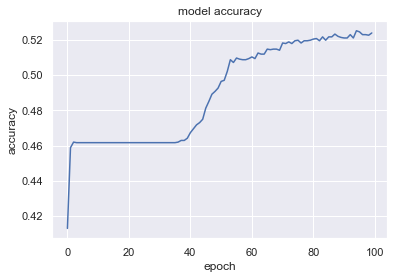

In [62]:
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show() #batch size 64 seems to be best for our dataset

In [64]:
modelnew = Sequential([
    Dense(units=16, input_shape=(12,), activation='sigmoid'),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'), #adding one more layer
    Dense(units=32, activation='relu'),
    Dense(units=3, activation='softmax')
])
modelnew.save_weights('modelnew.h5') #saving model with inital weights to tune hyperparameters
modelnew.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
historynew = modelnew.fit(
    x=X_train, 
    y=y_train,
    batch_size=64, 
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
50/50 - 0s - loss: 1.0776 - accuracy: 0.4534
Epoch 2/1000
50/50 - 0s - loss: 1.0580 - accuracy: 0.4616
Epoch 3/1000
50/50 - 0s - loss: 1.0497 - accuracy: 0.4645
Epoch 4/1000
50/50 - 0s - loss: 1.0443 - accuracy: 0.4667
Epoch 5/1000
50/50 - 0s - loss: 1.0395 - accuracy: 0.4724
Epoch 6/1000
50/50 - 0s - loss: 1.0347 - accuracy: 0.4806
Epoch 7/1000
50/50 - 0s - loss: 1.0300 - accuracy: 0.4844
Epoch 8/1000
50/50 - 0s - loss: 1.0250 - accuracy: 0.4863
Epoch 9/1000
50/50 - 0s - loss: 1.0207 - accuracy: 0.4998
Epoch 10/1000
50/50 - 0s - loss: 1.0162 - accuracy: 0.4983
Epoch 11/1000
50/50 - 0s - loss: 1.0120 - accuracy: 0.5049
Epoch 12/1000
50/50 - 0s - loss: 1.0083 - accuracy: 0.5103
Epoch 13/1000
50/50 - 0s - loss: 1.0049 - accuracy: 0.5122
Epoch 14/1000
50/50 - 0s - loss: 1.0026 - accuracy: 0.5128
Epoch 15/1000
50/50 - 0s - loss: 0.9995 - accuracy: 0.5141
Epoch 16/1000
50/50 - 0s - loss: 0.9974 - accuracy: 0.5156
Epoch 17/1000
50/50 - 0s - loss: 0.9959 - accuracy: 0.5160
Epoch 

Epoch 140/1000
50/50 - 0s - loss: 0.9702 - accuracy: 0.5355
Epoch 141/1000
50/50 - 0s - loss: 0.9702 - accuracy: 0.5374
Epoch 142/1000
50/50 - 0s - loss: 0.9700 - accuracy: 0.5365
Epoch 143/1000
50/50 - 0s - loss: 0.9699 - accuracy: 0.5362
Epoch 144/1000
50/50 - 0s - loss: 0.9699 - accuracy: 0.5365
Epoch 145/1000
50/50 - 0s - loss: 0.9701 - accuracy: 0.5362
Epoch 146/1000
50/50 - 0s - loss: 0.9695 - accuracy: 0.5378
Epoch 147/1000
50/50 - 0s - loss: 0.9705 - accuracy: 0.5336
Epoch 148/1000
50/50 - 0s - loss: 0.9698 - accuracy: 0.5365
Epoch 149/1000
50/50 - 0s - loss: 0.9694 - accuracy: 0.5384
Epoch 150/1000
50/50 - 0s - loss: 0.9696 - accuracy: 0.5365
Epoch 151/1000
50/50 - 0s - loss: 0.9695 - accuracy: 0.5365
Epoch 152/1000
50/50 - 0s - loss: 0.9693 - accuracy: 0.5393
Epoch 153/1000
50/50 - 0s - loss: 0.9697 - accuracy: 0.5381
Epoch 154/1000
50/50 - 0s - loss: 0.9690 - accuracy: 0.5400
Epoch 155/1000
50/50 - 0s - loss: 0.9692 - accuracy: 0.5365
Epoch 156/1000
50/50 - 0s - loss: 0.9688

Epoch 277/1000
50/50 - 0s - loss: 0.9628 - accuracy: 0.5397
Epoch 278/1000
50/50 - 0s - loss: 0.9628 - accuracy: 0.5438
Epoch 279/1000
50/50 - 0s - loss: 0.9622 - accuracy: 0.5450
Epoch 280/1000
50/50 - 0s - loss: 0.9623 - accuracy: 0.5415
Epoch 281/1000
50/50 - 0s - loss: 0.9620 - accuracy: 0.5412
Epoch 282/1000
50/50 - 0s - loss: 0.9625 - accuracy: 0.5431
Epoch 283/1000
50/50 - 0s - loss: 0.9620 - accuracy: 0.5431
Epoch 284/1000
50/50 - 0s - loss: 0.9619 - accuracy: 0.5438
Epoch 285/1000
50/50 - 0s - loss: 0.9617 - accuracy: 0.5444
Epoch 286/1000
50/50 - 0s - loss: 0.9628 - accuracy: 0.5400
Epoch 287/1000
50/50 - 0s - loss: 0.9623 - accuracy: 0.5397
Epoch 288/1000
50/50 - 0s - loss: 0.9615 - accuracy: 0.5403
Epoch 289/1000
50/50 - 0s - loss: 0.9620 - accuracy: 0.5403
Epoch 290/1000
50/50 - 0s - loss: 0.9618 - accuracy: 0.5431
Epoch 291/1000
50/50 - 0s - loss: 0.9619 - accuracy: 0.5422
Epoch 292/1000
50/50 - 0s - loss: 0.9617 - accuracy: 0.5419
Epoch 293/1000
50/50 - 0s - loss: 0.9619

Epoch 414/1000
50/50 - 0s - loss: 0.9558 - accuracy: 0.5406
Epoch 415/1000
50/50 - 0s - loss: 0.9554 - accuracy: 0.5438
Epoch 416/1000
50/50 - 0s - loss: 0.9554 - accuracy: 0.5419
Epoch 417/1000
50/50 - 0s - loss: 0.9558 - accuracy: 0.5425
Epoch 418/1000
50/50 - 0s - loss: 0.9555 - accuracy: 0.5415
Epoch 419/1000
50/50 - 0s - loss: 0.9556 - accuracy: 0.5460
Epoch 420/1000
50/50 - 0s - loss: 0.9553 - accuracy: 0.5422
Epoch 421/1000
50/50 - 0s - loss: 0.9552 - accuracy: 0.5438
Epoch 422/1000
50/50 - 0s - loss: 0.9557 - accuracy: 0.5447
Epoch 423/1000
50/50 - 0s - loss: 0.9550 - accuracy: 0.5419
Epoch 424/1000
50/50 - 0s - loss: 0.9547 - accuracy: 0.5438
Epoch 425/1000
50/50 - 0s - loss: 0.9547 - accuracy: 0.5434
Epoch 426/1000
50/50 - 0s - loss: 0.9551 - accuracy: 0.5412
Epoch 427/1000
50/50 - 0s - loss: 0.9549 - accuracy: 0.5422
Epoch 428/1000
50/50 - 0s - loss: 0.9546 - accuracy: 0.5428
Epoch 429/1000
50/50 - 0s - loss: 0.9540 - accuracy: 0.5472
Epoch 430/1000
50/50 - 0s - loss: 0.9552

Epoch 551/1000
50/50 - 0s - loss: 0.9470 - accuracy: 0.5485
Epoch 552/1000
50/50 - 0s - loss: 0.9483 - accuracy: 0.5476
Epoch 553/1000
50/50 - 0s - loss: 0.9474 - accuracy: 0.5491
Epoch 554/1000
50/50 - 0s - loss: 0.9478 - accuracy: 0.5485
Epoch 555/1000
50/50 - 0s - loss: 0.9475 - accuracy: 0.5494
Epoch 556/1000
50/50 - 0s - loss: 0.9475 - accuracy: 0.5494
Epoch 557/1000
50/50 - 0s - loss: 0.9472 - accuracy: 0.5526
Epoch 558/1000
50/50 - 0s - loss: 0.9472 - accuracy: 0.5504
Epoch 559/1000
50/50 - 0s - loss: 0.9473 - accuracy: 0.5488
Epoch 560/1000
50/50 - 0s - loss: 0.9464 - accuracy: 0.5513
Epoch 561/1000
50/50 - 0s - loss: 0.9478 - accuracy: 0.5523
Epoch 562/1000
50/50 - 0s - loss: 0.9466 - accuracy: 0.5488
Epoch 563/1000
50/50 - 0s - loss: 0.9468 - accuracy: 0.5494
Epoch 564/1000
50/50 - 0s - loss: 0.9463 - accuracy: 0.5494
Epoch 565/1000
50/50 - 0s - loss: 0.9468 - accuracy: 0.5494
Epoch 566/1000
50/50 - 0s - loss: 0.9464 - accuracy: 0.5504
Epoch 567/1000
50/50 - 0s - loss: 0.9468

Epoch 688/1000
50/50 - 0s - loss: 0.9389 - accuracy: 0.5558
Epoch 689/1000
50/50 - 0s - loss: 0.9392 - accuracy: 0.5548
Epoch 690/1000
50/50 - 0s - loss: 0.9390 - accuracy: 0.5564
Epoch 691/1000
50/50 - 0s - loss: 0.9383 - accuracy: 0.5555
Epoch 692/1000
50/50 - 0s - loss: 0.9389 - accuracy: 0.5532
Epoch 693/1000
50/50 - 0s - loss: 0.9393 - accuracy: 0.5615
Epoch 694/1000
50/50 - 0s - loss: 0.9396 - accuracy: 0.5580
Epoch 695/1000
50/50 - 0s - loss: 0.9394 - accuracy: 0.5529
Epoch 696/1000
50/50 - 0s - loss: 0.9398 - accuracy: 0.5536
Epoch 697/1000
50/50 - 0s - loss: 0.9392 - accuracy: 0.5539
Epoch 698/1000
50/50 - 0s - loss: 0.9387 - accuracy: 0.5539
Epoch 699/1000
50/50 - 0s - loss: 0.9385 - accuracy: 0.5548
Epoch 700/1000
50/50 - 0s - loss: 0.9387 - accuracy: 0.5539
Epoch 701/1000
50/50 - 0s - loss: 0.9384 - accuracy: 0.5536
Epoch 702/1000
50/50 - 0s - loss: 0.9390 - accuracy: 0.5526
Epoch 703/1000
50/50 - 0s - loss: 0.9383 - accuracy: 0.5542
Epoch 704/1000
50/50 - 0s - loss: 0.9379

Epoch 825/1000
50/50 - 0s - loss: 0.9305 - accuracy: 0.5611
Epoch 826/1000
50/50 - 0s - loss: 0.9303 - accuracy: 0.5602
Epoch 827/1000
50/50 - 0s - loss: 0.9308 - accuracy: 0.5592
Epoch 828/1000
50/50 - 0s - loss: 0.9302 - accuracy: 0.5580
Epoch 829/1000
50/50 - 0s - loss: 0.9302 - accuracy: 0.5618
Epoch 830/1000
50/50 - 0s - loss: 0.9304 - accuracy: 0.5602
Epoch 831/1000
50/50 - 0s - loss: 0.9300 - accuracy: 0.5592
Epoch 832/1000
50/50 - 0s - loss: 0.9304 - accuracy: 0.5608
Epoch 833/1000
50/50 - 0s - loss: 0.9303 - accuracy: 0.5602
Epoch 834/1000
50/50 - 0s - loss: 0.9297 - accuracy: 0.5567
Epoch 835/1000
50/50 - 0s - loss: 0.9295 - accuracy: 0.5618
Epoch 836/1000
50/50 - 0s - loss: 0.9296 - accuracy: 0.5627
Epoch 837/1000
50/50 - 0s - loss: 0.9300 - accuracy: 0.5599
Epoch 838/1000
50/50 - 0s - loss: 0.9297 - accuracy: 0.5577
Epoch 839/1000
50/50 - 0s - loss: 0.9299 - accuracy: 0.5624
Epoch 840/1000
50/50 - 0s - loss: 0.9291 - accuracy: 0.5621
Epoch 841/1000
50/50 - 0s - loss: 0.9296

Epoch 962/1000
50/50 - 0s - loss: 0.9222 - accuracy: 0.5615
Epoch 963/1000
50/50 - 0s - loss: 0.9220 - accuracy: 0.5627
Epoch 964/1000
50/50 - 0s - loss: 0.9226 - accuracy: 0.5618
Epoch 965/1000
50/50 - 0s - loss: 0.9218 - accuracy: 0.5633
Epoch 966/1000
50/50 - 0s - loss: 0.9220 - accuracy: 0.5599
Epoch 967/1000
50/50 - 0s - loss: 0.9220 - accuracy: 0.5608
Epoch 968/1000
50/50 - 0s - loss: 0.9224 - accuracy: 0.5668
Epoch 969/1000
50/50 - 0s - loss: 0.9220 - accuracy: 0.5615
Epoch 970/1000
50/50 - 0s - loss: 0.9237 - accuracy: 0.5656
Epoch 971/1000
50/50 - 0s - loss: 0.9217 - accuracy: 0.5624
Epoch 972/1000
50/50 - 0s - loss: 0.9220 - accuracy: 0.5596
Epoch 973/1000
50/50 - 0s - loss: 0.9213 - accuracy: 0.5675
Epoch 974/1000
50/50 - 0s - loss: 0.9213 - accuracy: 0.5615
Epoch 975/1000
50/50 - 0s - loss: 0.9211 - accuracy: 0.5637
Epoch 976/1000
50/50 - 0s - loss: 0.9218 - accuracy: 0.5643
Epoch 977/1000
50/50 - 0s - loss: 0.9215 - accuracy: 0.5627
Epoch 978/1000
50/50 - 0s - loss: 0.9219

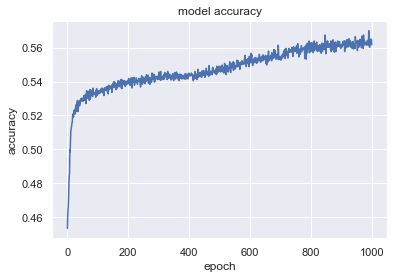

In [65]:
plt.plot(historynew.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show() # accuracy seemed to increase with epochs and new layer. will test model without new layer

In [ ]:
model.load_weights('model.h5') #resetting weights
history3 = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=128, 
    epochs=1000,
    shuffle=True,
    verbose=2
)

In [ ]:
plt.plot(history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show() # new layer increased accuracy by ~3%

In [67]:
modelnewupdated = Sequential([
    Dense(units=16, input_shape=(12,), activation='sigmoid'),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'), #adding one more layer
    Dense(units=128, activation='sigmoid'),# another 2 layers
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=3, activation='softmax')
])
modelnewupdated.save_weights('modelnewupdated.h5') #saving model with inital weights to tune hyperparameters
modelnewupdated.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
historynewupdated = modelnewupdated.fit(
    x=X_train, 
    y=y_train,
    batch_size=64, 
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
50/50 - 0s - loss: 1.0703 - accuracy: 0.4348
Epoch 2/1000
50/50 - 0s - loss: 1.0598 - accuracy: 0.4616
Epoch 3/1000
50/50 - 0s - loss: 1.0592 - accuracy: 0.4616
Epoch 4/1000
50/50 - 0s - loss: 1.0571 - accuracy: 0.4616
Epoch 5/1000
50/50 - 0s - loss: 1.0557 - accuracy: 0.4616
Epoch 6/1000
50/50 - 0s - loss: 1.0509 - accuracy: 0.4616
Epoch 7/1000
50/50 - 0s - loss: 1.0459 - accuracy: 0.4616
Epoch 8/1000
50/50 - 0s - loss: 1.0403 - accuracy: 0.4619
Epoch 9/1000
50/50 - 0s - loss: 1.0318 - accuracy: 0.4730
Epoch 10/1000
50/50 - 0s - loss: 1.0236 - accuracy: 0.4954
Epoch 11/1000
50/50 - 0s - loss: 1.0117 - accuracy: 0.5109
Epoch 12/1000
50/50 - 0s - loss: 1.0063 - accuracy: 0.5106
Epoch 13/1000
50/50 - 0s - loss: 0.9998 - accuracy: 0.5191
Epoch 14/1000
50/50 - 0s - loss: 0.9954 - accuracy: 0.5169
Epoch 15/1000
50/50 - 0s - loss: 0.9935 - accuracy: 0.5220
Epoch 16/1000
50/50 - 0s - loss: 0.9913 - accuracy: 0.5213
Epoch 17/1000
50/50 - 0s - loss: 0.9890 - accuracy: 0.5242
Epoch 

Epoch 140/1000
50/50 - 0s - loss: 0.9754 - accuracy: 0.5340
Epoch 141/1000
50/50 - 0s - loss: 0.9752 - accuracy: 0.5346
Epoch 142/1000
50/50 - 0s - loss: 0.9744 - accuracy: 0.5355
Epoch 143/1000
50/50 - 0s - loss: 0.9745 - accuracy: 0.5336
Epoch 144/1000
50/50 - 0s - loss: 0.9752 - accuracy: 0.5311
Epoch 145/1000
50/50 - 0s - loss: 0.9750 - accuracy: 0.5365
Epoch 146/1000
50/50 - 0s - loss: 0.9753 - accuracy: 0.5295
Epoch 147/1000
50/50 - 0s - loss: 0.9742 - accuracy: 0.5336
Epoch 148/1000
50/50 - 0s - loss: 0.9743 - accuracy: 0.5365
Epoch 149/1000
50/50 - 0s - loss: 0.9746 - accuracy: 0.5346
Epoch 150/1000
50/50 - 0s - loss: 0.9747 - accuracy: 0.5330
Epoch 151/1000
50/50 - 0s - loss: 0.9739 - accuracy: 0.5343
Epoch 152/1000
50/50 - 0s - loss: 0.9742 - accuracy: 0.5336
Epoch 153/1000
50/50 - 0s - loss: 0.9756 - accuracy: 0.5302
Epoch 154/1000
50/50 - 0s - loss: 0.9737 - accuracy: 0.5336
Epoch 155/1000
50/50 - 0s - loss: 0.9737 - accuracy: 0.5330
Epoch 156/1000
50/50 - 0s - loss: 0.9740

Epoch 277/1000
50/50 - 0s - loss: 0.9695 - accuracy: 0.5359
Epoch 278/1000
50/50 - 0s - loss: 0.9689 - accuracy: 0.5365
Epoch 279/1000
50/50 - 0s - loss: 0.9683 - accuracy: 0.5336
Epoch 280/1000
50/50 - 0s - loss: 0.9690 - accuracy: 0.5311
Epoch 281/1000
50/50 - 0s - loss: 0.9685 - accuracy: 0.5384
Epoch 282/1000
50/50 - 0s - loss: 0.9680 - accuracy: 0.5368
Epoch 283/1000
50/50 - 0s - loss: 0.9680 - accuracy: 0.5381
Epoch 284/1000
50/50 - 0s - loss: 0.9682 - accuracy: 0.5384
Epoch 285/1000
50/50 - 0s - loss: 0.9685 - accuracy: 0.5387
Epoch 286/1000
50/50 - 0s - loss: 0.9700 - accuracy: 0.5308
Epoch 287/1000
50/50 - 0s - loss: 0.9677 - accuracy: 0.5327
Epoch 288/1000
50/50 - 0s - loss: 0.9676 - accuracy: 0.5371
Epoch 289/1000
50/50 - 0s - loss: 0.9685 - accuracy: 0.5340
Epoch 290/1000
50/50 - 0s - loss: 0.9695 - accuracy: 0.5349
Epoch 291/1000
50/50 - 0s - loss: 0.9684 - accuracy: 0.5362
Epoch 292/1000
50/50 - 0s - loss: 0.9691 - accuracy: 0.5333
Epoch 293/1000
50/50 - 0s - loss: 0.9675

Epoch 414/1000
50/50 - 0s - loss: 0.9628 - accuracy: 0.5412
Epoch 415/1000
50/50 - 0s - loss: 0.9627 - accuracy: 0.5422
Epoch 416/1000
50/50 - 0s - loss: 0.9621 - accuracy: 0.5371
Epoch 417/1000
50/50 - 0s - loss: 0.9614 - accuracy: 0.5434
Epoch 418/1000
50/50 - 0s - loss: 0.9620 - accuracy: 0.5425
Epoch 419/1000
50/50 - 0s - loss: 0.9624 - accuracy: 0.5422
Epoch 420/1000
50/50 - 0s - loss: 0.9621 - accuracy: 0.5403
Epoch 421/1000
50/50 - 0s - loss: 0.9622 - accuracy: 0.5425
Epoch 422/1000
50/50 - 0s - loss: 0.9622 - accuracy: 0.5460
Epoch 423/1000
50/50 - 0s - loss: 0.9620 - accuracy: 0.5422
Epoch 424/1000
50/50 - 0s - loss: 0.9632 - accuracy: 0.5438
Epoch 425/1000
50/50 - 0s - loss: 0.9613 - accuracy: 0.5453
Epoch 426/1000
50/50 - 0s - loss: 0.9613 - accuracy: 0.5403
Epoch 427/1000
50/50 - 0s - loss: 0.9624 - accuracy: 0.5412
Epoch 428/1000
50/50 - 0s - loss: 0.9622 - accuracy: 0.5425
Epoch 429/1000
50/50 - 0s - loss: 0.9618 - accuracy: 0.5393
Epoch 430/1000
50/50 - 0s - loss: 0.9624

Epoch 551/1000
50/50 - 0s - loss: 0.9557 - accuracy: 0.5510
Epoch 552/1000
50/50 - 0s - loss: 0.9585 - accuracy: 0.5438
Epoch 553/1000
50/50 - 0s - loss: 0.9596 - accuracy: 0.5469
Epoch 554/1000
50/50 - 0s - loss: 0.9557 - accuracy: 0.5466
Epoch 555/1000
50/50 - 0s - loss: 0.9562 - accuracy: 0.5526
Epoch 556/1000
50/50 - 0s - loss: 0.9565 - accuracy: 0.5548
Epoch 557/1000
50/50 - 0s - loss: 0.9586 - accuracy: 0.5463
Epoch 558/1000
50/50 - 0s - loss: 0.9563 - accuracy: 0.5453
Epoch 559/1000
50/50 - 0s - loss: 0.9563 - accuracy: 0.5482
Epoch 560/1000
50/50 - 0s - loss: 0.9561 - accuracy: 0.5488
Epoch 561/1000
50/50 - 0s - loss: 0.9558 - accuracy: 0.5494
Epoch 562/1000
50/50 - 0s - loss: 0.9565 - accuracy: 0.5469
Epoch 563/1000
50/50 - 0s - loss: 0.9550 - accuracy: 0.5447
Epoch 564/1000
50/50 - 0s - loss: 0.9571 - accuracy: 0.5491
Epoch 565/1000
50/50 - 0s - loss: 0.9567 - accuracy: 0.5453
Epoch 566/1000
50/50 - 0s - loss: 0.9560 - accuracy: 0.5498
Epoch 567/1000
50/50 - 0s - loss: 0.9570

Epoch 688/1000
50/50 - 0s - loss: 0.9510 - accuracy: 0.5479
Epoch 689/1000
50/50 - 0s - loss: 0.9536 - accuracy: 0.5494
Epoch 690/1000
50/50 - 0s - loss: 0.9508 - accuracy: 0.5504
Epoch 691/1000
50/50 - 0s - loss: 0.9508 - accuracy: 0.5513
Epoch 692/1000
50/50 - 0s - loss: 0.9519 - accuracy: 0.5526
Epoch 693/1000
50/50 - 0s - loss: 0.9511 - accuracy: 0.5510
Epoch 694/1000
50/50 - 0s - loss: 0.9509 - accuracy: 0.5517
Epoch 695/1000
50/50 - 0s - loss: 0.9510 - accuracy: 0.5488
Epoch 696/1000
50/50 - 0s - loss: 0.9508 - accuracy: 0.5485
Epoch 697/1000
50/50 - 0s - loss: 0.9528 - accuracy: 0.5466
Epoch 698/1000
50/50 - 0s - loss: 0.9507 - accuracy: 0.5532
Epoch 699/1000
50/50 - 0s - loss: 0.9521 - accuracy: 0.5498
Epoch 700/1000
50/50 - 0s - loss: 0.9512 - accuracy: 0.5507
Epoch 701/1000
50/50 - 0s - loss: 0.9499 - accuracy: 0.5532
Epoch 702/1000
50/50 - 0s - loss: 0.9511 - accuracy: 0.5479
Epoch 703/1000
50/50 - 0s - loss: 0.9502 - accuracy: 0.5482
Epoch 704/1000
50/50 - 0s - loss: 0.9538

Epoch 825/1000
50/50 - 0s - loss: 0.9473 - accuracy: 0.5523
Epoch 826/1000
50/50 - 0s - loss: 0.9477 - accuracy: 0.5558
Epoch 827/1000
50/50 - 0s - loss: 0.9476 - accuracy: 0.5510
Epoch 828/1000
50/50 - 0s - loss: 0.9475 - accuracy: 0.5476
Epoch 829/1000
50/50 - 0s - loss: 0.9487 - accuracy: 0.5520
Epoch 830/1000
50/50 - 0s - loss: 0.9465 - accuracy: 0.5520
Epoch 831/1000
50/50 - 0s - loss: 0.9469 - accuracy: 0.5539
Epoch 832/1000
50/50 - 0s - loss: 0.9477 - accuracy: 0.5482
Epoch 833/1000
50/50 - 0s - loss: 0.9481 - accuracy: 0.5513
Epoch 834/1000
50/50 - 0s - loss: 0.9466 - accuracy: 0.5513
Epoch 835/1000
50/50 - 0s - loss: 0.9468 - accuracy: 0.5504
Epoch 836/1000
50/50 - 0s - loss: 0.9460 - accuracy: 0.5536
Epoch 837/1000
50/50 - 0s - loss: 0.9499 - accuracy: 0.5460
Epoch 838/1000
50/50 - 0s - loss: 0.9468 - accuracy: 0.5517
Epoch 839/1000
50/50 - 0s - loss: 0.9461 - accuracy: 0.5488
Epoch 840/1000
50/50 - 0s - loss: 0.9476 - accuracy: 0.5536
Epoch 841/1000
50/50 - 0s - loss: 0.9452

Epoch 962/1000
50/50 - 0s - loss: 0.9441 - accuracy: 0.5501
Epoch 963/1000
50/50 - 0s - loss: 0.9433 - accuracy: 0.5555
Epoch 964/1000
50/50 - 0s - loss: 0.9463 - accuracy: 0.5523
Epoch 965/1000
50/50 - 0s - loss: 0.9423 - accuracy: 0.5615
Epoch 966/1000
50/50 - 0s - loss: 0.9447 - accuracy: 0.5536
Epoch 967/1000
50/50 - 0s - loss: 0.9439 - accuracy: 0.5545
Epoch 968/1000
50/50 - 0s - loss: 0.9431 - accuracy: 0.5583
Epoch 969/1000
50/50 - 0s - loss: 0.9436 - accuracy: 0.5558
Epoch 970/1000
50/50 - 0s - loss: 0.9437 - accuracy: 0.5558
Epoch 971/1000
50/50 - 0s - loss: 0.9437 - accuracy: 0.5558
Epoch 972/1000
50/50 - 0s - loss: 0.9437 - accuracy: 0.5523
Epoch 973/1000
50/50 - 0s - loss: 0.9434 - accuracy: 0.5577
Epoch 974/1000
50/50 - 0s - loss: 0.9422 - accuracy: 0.5539
Epoch 975/1000
50/50 - 0s - loss: 0.9437 - accuracy: 0.5564
Epoch 976/1000
50/50 - 0s - loss: 0.9430 - accuracy: 0.5551
Epoch 977/1000
50/50 - 0s - loss: 0.9431 - accuracy: 0.5567
Epoch 978/1000
50/50 - 0s - loss: 0.9433

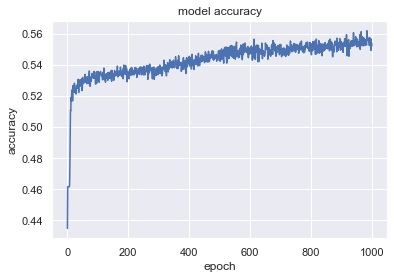

In [68]:
plt.plot(historynewupdated.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show() 

In [ ]:
# new layers seem to have made the model even more accurate. test with more epoch
modelnewupdated.load_weights('modelnewupdated.h5') #resetting weights
historynewupdated = modelnewupdated.fit(
    x=X_train, 
    y=y_train,
    batch_size=64, 
    epochs=5000,
    shuffle=True,
    verbose=2
)

In [ ]:
plt.plot(historynewupdated.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show() 

In [69]:
print("Evaluate on test data")
results = modelnewupdated.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
22/22 [==============================] - 0s 568us/step - loss: 0.9978 - accuracy: 0.5004
test loss, test acc: [0.9978497624397278, 0.5003684759140015]


In [70]:
print("Evaluate on test data")
results = modelnew.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
11/11 [==============================] - 0s 643us/step - loss: 0.9969 - accuracy: 0.4974
test loss, test acc: [0.9969223141670227, 0.4974207878112793]


In [71]:
# 5000 epochs increased accuracy on training but not test, less layers seemed more accurate on test
modelnewupdated.load_weights('modelnewupdated.h5') #resetting weights
historynewupdated = modelnewupdated.fit(
    x=X_train, 
    y=y_train,
    batch_size=64, 
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
50/50 - 0s - loss: 1.0786 - accuracy: 0.4142
Epoch 2/1000
50/50 - 0s - loss: 1.0621 - accuracy: 0.4616
Epoch 3/1000
50/50 - 0s - loss: 1.0617 - accuracy: 0.4616
Epoch 4/1000
50/50 - 0s - loss: 1.0612 - accuracy: 0.4616
Epoch 5/1000
50/50 - 0s - loss: 1.0610 - accuracy: 0.4616
Epoch 6/1000
50/50 - 0s - loss: 1.0608 - accuracy: 0.4616
Epoch 7/1000
50/50 - 0s - loss: 1.0614 - accuracy: 0.4616
Epoch 8/1000
50/50 - 0s - loss: 1.0606 - accuracy: 0.4616
Epoch 9/1000
50/50 - 0s - loss: 1.0597 - accuracy: 0.4616
Epoch 10/1000
50/50 - 0s - loss: 1.0596 - accuracy: 0.4616
Epoch 11/1000
50/50 - 0s - loss: 1.0591 - accuracy: 0.4616
Epoch 12/1000
50/50 - 0s - loss: 1.0586 - accuracy: 0.4616
Epoch 13/1000
50/50 - 0s - loss: 1.0575 - accuracy: 0.4616
Epoch 14/1000
50/50 - 0s - loss: 1.0575 - accuracy: 0.4616
Epoch 15/1000
50/50 - 0s - loss: 1.0563 - accuracy: 0.4616
Epoch 16/1000
50/50 - 0s - loss: 1.0555 - accuracy: 0.4616
Epoch 17/1000
50/50 - 0s - loss: 1.0547 - accuracy: 0.4616
Epoch 

Epoch 140/1000
50/50 - 0s - loss: 0.9765 - accuracy: 0.5340
Epoch 141/1000
50/50 - 0s - loss: 0.9765 - accuracy: 0.5378
Epoch 142/1000
50/50 - 0s - loss: 0.9782 - accuracy: 0.5349
Epoch 143/1000
50/50 - 0s - loss: 0.9765 - accuracy: 0.5378
Epoch 144/1000
50/50 - 0s - loss: 0.9767 - accuracy: 0.5349
Epoch 145/1000
50/50 - 0s - loss: 0.9766 - accuracy: 0.5308
Epoch 146/1000
50/50 - 0s - loss: 0.9753 - accuracy: 0.5368
Epoch 147/1000
50/50 - 0s - loss: 0.9767 - accuracy: 0.5371
Epoch 148/1000
50/50 - 0s - loss: 0.9756 - accuracy: 0.5378
Epoch 149/1000
50/50 - 0s - loss: 0.9758 - accuracy: 0.5359
Epoch 150/1000
50/50 - 0s - loss: 0.9761 - accuracy: 0.5346
Epoch 151/1000
50/50 - 0s - loss: 0.9769 - accuracy: 0.5273
Epoch 152/1000
50/50 - 0s - loss: 0.9778 - accuracy: 0.5286
Epoch 153/1000
50/50 - 0s - loss: 0.9769 - accuracy: 0.5330
Epoch 154/1000
50/50 - 0s - loss: 0.9758 - accuracy: 0.5355
Epoch 155/1000
50/50 - 0s - loss: 0.9746 - accuracy: 0.5368
Epoch 156/1000
50/50 - 0s - loss: 0.9760

Epoch 277/1000
50/50 - 0s - loss: 0.9684 - accuracy: 0.5371
Epoch 278/1000
50/50 - 0s - loss: 0.9689 - accuracy: 0.5352
Epoch 279/1000
50/50 - 0s - loss: 0.9691 - accuracy: 0.5359
Epoch 280/1000
50/50 - 0s - loss: 0.9692 - accuracy: 0.5362
Epoch 281/1000
50/50 - 0s - loss: 0.9685 - accuracy: 0.5371
Epoch 282/1000
50/50 - 0s - loss: 0.9682 - accuracy: 0.5378
Epoch 283/1000
50/50 - 0s - loss: 0.9684 - accuracy: 0.5374
Epoch 284/1000
50/50 - 0s - loss: 0.9687 - accuracy: 0.5400
Epoch 285/1000
50/50 - 0s - loss: 0.9681 - accuracy: 0.5400
Epoch 286/1000
50/50 - 0s - loss: 0.9684 - accuracy: 0.5397
Epoch 287/1000
50/50 - 0s - loss: 0.9694 - accuracy: 0.5384
Epoch 288/1000
50/50 - 0s - loss: 0.9684 - accuracy: 0.5381
Epoch 289/1000
50/50 - 0s - loss: 0.9681 - accuracy: 0.5400
Epoch 290/1000
50/50 - 0s - loss: 0.9684 - accuracy: 0.5381
Epoch 291/1000
50/50 - 0s - loss: 0.9676 - accuracy: 0.5412
Epoch 292/1000
50/50 - 0s - loss: 0.9688 - accuracy: 0.5324
Epoch 293/1000
50/50 - 0s - loss: 0.9686

Epoch 414/1000
50/50 - 0s - loss: 0.9639 - accuracy: 0.5431
Epoch 415/1000
50/50 - 0s - loss: 0.9623 - accuracy: 0.5419
Epoch 416/1000
50/50 - 0s - loss: 0.9635 - accuracy: 0.5463
Epoch 417/1000
50/50 - 0s - loss: 0.9626 - accuracy: 0.5444
Epoch 418/1000
50/50 - 0s - loss: 0.9632 - accuracy: 0.5412
Epoch 419/1000
50/50 - 0s - loss: 0.9624 - accuracy: 0.5425
Epoch 420/1000
50/50 - 0s - loss: 0.9632 - accuracy: 0.5406
Epoch 421/1000
50/50 - 0s - loss: 0.9627 - accuracy: 0.5441
Epoch 422/1000
50/50 - 0s - loss: 0.9633 - accuracy: 0.5453
Epoch 423/1000
50/50 - 0s - loss: 0.9627 - accuracy: 0.5422
Epoch 424/1000
50/50 - 0s - loss: 0.9638 - accuracy: 0.5406
Epoch 425/1000
50/50 - 0s - loss: 0.9637 - accuracy: 0.5400
Epoch 426/1000
50/50 - 0s - loss: 0.9627 - accuracy: 0.5472
Epoch 427/1000
50/50 - 0s - loss: 0.9627 - accuracy: 0.5447
Epoch 428/1000
50/50 - 0s - loss: 0.9630 - accuracy: 0.5415
Epoch 429/1000
50/50 - 0s - loss: 0.9615 - accuracy: 0.5476
Epoch 430/1000
50/50 - 0s - loss: 0.9618

Epoch 551/1000
50/50 - 0s - loss: 0.9571 - accuracy: 0.5479
Epoch 552/1000
50/50 - 0s - loss: 0.9549 - accuracy: 0.5482
Epoch 553/1000
50/50 - 0s - loss: 0.9546 - accuracy: 0.5526
Epoch 554/1000
50/50 - 0s - loss: 0.9561 - accuracy: 0.5469
Epoch 555/1000
50/50 - 0s - loss: 0.9553 - accuracy: 0.5460
Epoch 556/1000
50/50 - 0s - loss: 0.9558 - accuracy: 0.5476
Epoch 557/1000
50/50 - 0s - loss: 0.9561 - accuracy: 0.5447
Epoch 558/1000
50/50 - 0s - loss: 0.9558 - accuracy: 0.5507
Epoch 559/1000
50/50 - 0s - loss: 0.9554 - accuracy: 0.5466
Epoch 560/1000
50/50 - 0s - loss: 0.9550 - accuracy: 0.5498
Epoch 561/1000
50/50 - 0s - loss: 0.9555 - accuracy: 0.5485
Epoch 562/1000
50/50 - 0s - loss: 0.9553 - accuracy: 0.5441
Epoch 563/1000
50/50 - 0s - loss: 0.9550 - accuracy: 0.5488
Epoch 564/1000
50/50 - 0s - loss: 0.9548 - accuracy: 0.5460
Epoch 565/1000
50/50 - 0s - loss: 0.9557 - accuracy: 0.5466
Epoch 566/1000
50/50 - 0s - loss: 0.9549 - accuracy: 0.5460
Epoch 567/1000
50/50 - 0s - loss: 0.9566

Epoch 688/1000
50/50 - 0s - loss: 0.9506 - accuracy: 0.5510
Epoch 689/1000
50/50 - 0s - loss: 0.9472 - accuracy: 0.5498
Epoch 690/1000
50/50 - 0s - loss: 0.9483 - accuracy: 0.5485
Epoch 691/1000
50/50 - 0s - loss: 0.9505 - accuracy: 0.5472
Epoch 692/1000
50/50 - 0s - loss: 0.9498 - accuracy: 0.5482
Epoch 693/1000
50/50 - 0s - loss: 0.9486 - accuracy: 0.5428
Epoch 694/1000
50/50 - 0s - loss: 0.9474 - accuracy: 0.5501
Epoch 695/1000
50/50 - 0s - loss: 0.9490 - accuracy: 0.5507
Epoch 696/1000
50/50 - 0s - loss: 0.9480 - accuracy: 0.5498
Epoch 697/1000
50/50 - 0s - loss: 0.9462 - accuracy: 0.5491
Epoch 698/1000
50/50 - 0s - loss: 0.9469 - accuracy: 0.5501
Epoch 699/1000
50/50 - 0s - loss: 0.9487 - accuracy: 0.5441
Epoch 700/1000
50/50 - 0s - loss: 0.9493 - accuracy: 0.5463
Epoch 701/1000
50/50 - 0s - loss: 0.9474 - accuracy: 0.5526
Epoch 702/1000
50/50 - 0s - loss: 0.9476 - accuracy: 0.5494
Epoch 703/1000
50/50 - 0s - loss: 0.9470 - accuracy: 0.5434
Epoch 704/1000
50/50 - 0s - loss: 0.9472

Epoch 825/1000
50/50 - 0s - loss: 0.9404 - accuracy: 0.5532
Epoch 826/1000
50/50 - 0s - loss: 0.9393 - accuracy: 0.5551
Epoch 827/1000
50/50 - 0s - loss: 0.9409 - accuracy: 0.5526
Epoch 828/1000
50/50 - 0s - loss: 0.9408 - accuracy: 0.5551
Epoch 829/1000
50/50 - 0s - loss: 0.9407 - accuracy: 0.5567
Epoch 830/1000
50/50 - 0s - loss: 0.9389 - accuracy: 0.5570
Epoch 831/1000
50/50 - 0s - loss: 0.9392 - accuracy: 0.5510
Epoch 832/1000
50/50 - 0s - loss: 0.9387 - accuracy: 0.5567
Epoch 833/1000
50/50 - 0s - loss: 0.9399 - accuracy: 0.5539
Epoch 834/1000
50/50 - 0s - loss: 0.9392 - accuracy: 0.5561
Epoch 835/1000
50/50 - 0s - loss: 0.9408 - accuracy: 0.5526
Epoch 836/1000
50/50 - 0s - loss: 0.9393 - accuracy: 0.5482
Epoch 837/1000
50/50 - 0s - loss: 0.9397 - accuracy: 0.5536
Epoch 838/1000
50/50 - 0s - loss: 0.9387 - accuracy: 0.5520
Epoch 839/1000
50/50 - 0s - loss: 0.9430 - accuracy: 0.5482
Epoch 840/1000
50/50 - 0s - loss: 0.9387 - accuracy: 0.5583
Epoch 841/1000
50/50 - 0s - loss: 0.9394

Epoch 962/1000
50/50 - 0s - loss: 0.9323 - accuracy: 0.5567
Epoch 963/1000
50/50 - 0s - loss: 0.9320 - accuracy: 0.5529
Epoch 964/1000
50/50 - 0s - loss: 0.9335 - accuracy: 0.5592
Epoch 965/1000
50/50 - 0s - loss: 0.9332 - accuracy: 0.5605
Epoch 966/1000
50/50 - 0s - loss: 0.9327 - accuracy: 0.5599
Epoch 967/1000
50/50 - 0s - loss: 0.9333 - accuracy: 0.5555
Epoch 968/1000
50/50 - 0s - loss: 0.9333 - accuracy: 0.5618
Epoch 969/1000
50/50 - 0s - loss: 0.9332 - accuracy: 0.5561
Epoch 970/1000
50/50 - 0s - loss: 0.9331 - accuracy: 0.5589
Epoch 971/1000
50/50 - 0s - loss: 0.9323 - accuracy: 0.5596
Epoch 972/1000
50/50 - 0s - loss: 0.9329 - accuracy: 0.5523
Epoch 973/1000
50/50 - 0s - loss: 0.9320 - accuracy: 0.5624
Epoch 974/1000
50/50 - 0s - loss: 0.9334 - accuracy: 0.5577
Epoch 975/1000
50/50 - 0s - loss: 0.9328 - accuracy: 0.5586
Epoch 976/1000
50/50 - 0s - loss: 0.9312 - accuracy: 0.5580
Epoch 977/1000
50/50 - 0s - loss: 0.9322 - accuracy: 0.5513
Epoch 978/1000
50/50 - 0s - loss: 0.9340

In [72]:
print("Evaluate on test data")
results = modelnewupdated.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results) #modelnew more accurate

Evaluate on test data
22/22 [==============================] - 0s 837us/step - loss: 0.9910 - accuracy: 0.5114
test loss, test acc: [0.9910160303115845, 0.5114222764968872]


In [73]:

print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results) #basic model seems most accurate

Evaluate on test data
22/22 [==============================] - 0s 675us/step - loss: 0.9948 - accuracy: 0.5262
test loss, test acc: [0.9948387742042542, 0.5261606574058533]


In [75]:
model9 = Sequential([
    Dense(units=16, input_shape=(12,), activation='sigmoid'), #relu lower accuracy
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=3, activation='softmax')
])
model9.save_weights('model9.h5') #saving model with inital weights to tune hyperparameters
model9.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
history9 = model9.fit(
    x=X_train, 
    y=y_train,
    batch_size=64, 
    epochs= 750, #750 best no over/underfitting
    shuffle=True,
    verbose=2
)

Epoch 1/750
50/50 - 0s - loss: 1.1434 - accuracy: 0.2907
Epoch 2/750
50/50 - 0s - loss: 1.0858 - accuracy: 0.3782
Epoch 3/750
50/50 - 0s - loss: 1.0587 - accuracy: 0.4913
Epoch 4/750
50/50 - 0s - loss: 1.0481 - accuracy: 0.4727
Epoch 5/750
50/50 - 0s - loss: 1.0428 - accuracy: 0.4714
Epoch 6/750
50/50 - 0s - loss: 1.0391 - accuracy: 0.4761
Epoch 7/750
50/50 - 0s - loss: 1.0359 - accuracy: 0.4774
Epoch 8/750
50/50 - 0s - loss: 1.0328 - accuracy: 0.4806
Epoch 9/750
50/50 - 0s - loss: 1.0300 - accuracy: 0.4828
Epoch 10/750
50/50 - 0s - loss: 1.0271 - accuracy: 0.4891
Epoch 11/750
50/50 - 0s - loss: 1.0242 - accuracy: 0.4929
Epoch 12/750
50/50 - 0s - loss: 1.0216 - accuracy: 0.4967
Epoch 13/750
50/50 - 0s - loss: 1.0187 - accuracy: 0.5005
Epoch 14/750
50/50 - 0s - loss: 1.0162 - accuracy: 0.5021
Epoch 15/750
50/50 - 0s - loss: 1.0139 - accuracy: 0.5052
Epoch 16/750
50/50 - 0s - loss: 1.0115 - accuracy: 0.5074
Epoch 17/750
50/50 - 0s - loss: 1.0092 - accuracy: 0.5068
Epoch 18/750
50/50 - 0s

Epoch 142/750
50/50 - 0s - loss: 0.9734 - accuracy: 0.5308
Epoch 143/750
50/50 - 0s - loss: 0.9735 - accuracy: 0.5318
Epoch 144/750
50/50 - 0s - loss: 0.9732 - accuracy: 0.5308
Epoch 145/750
50/50 - 0s - loss: 0.9736 - accuracy: 0.5336
Epoch 146/750
50/50 - 0s - loss: 0.9733 - accuracy: 0.5311
Epoch 147/750
50/50 - 0s - loss: 0.9732 - accuracy: 0.5318
Epoch 148/750
50/50 - 0s - loss: 0.9732 - accuracy: 0.5327
Epoch 149/750
50/50 - 0s - loss: 0.9732 - accuracy: 0.5314
Epoch 150/750
50/50 - 0s - loss: 0.9732 - accuracy: 0.5308
Epoch 151/750
50/50 - 0s - loss: 0.9730 - accuracy: 0.5311
Epoch 152/750
50/50 - 0s - loss: 0.9730 - accuracy: 0.5321
Epoch 153/750
50/50 - 0s - loss: 0.9730 - accuracy: 0.5311
Epoch 154/750
50/50 - 0s - loss: 0.9730 - accuracy: 0.5321
Epoch 155/750
50/50 - 0s - loss: 0.9728 - accuracy: 0.5321
Epoch 156/750
50/50 - 0s - loss: 0.9730 - accuracy: 0.5302
Epoch 157/750
50/50 - 0s - loss: 0.9727 - accuracy: 0.5324
Epoch 158/750
50/50 - 0s - loss: 0.9727 - accuracy: 0.53

Epoch 281/750
50/50 - 0s - loss: 0.9676 - accuracy: 0.5352
Epoch 282/750
50/50 - 0s - loss: 0.9675 - accuracy: 0.5378
Epoch 283/750
50/50 - 0s - loss: 0.9675 - accuracy: 0.5371
Epoch 284/750
50/50 - 0s - loss: 0.9674 - accuracy: 0.5371
Epoch 285/750
50/50 - 0s - loss: 0.9676 - accuracy: 0.5378
Epoch 286/750
50/50 - 0s - loss: 0.9676 - accuracy: 0.5378
Epoch 287/750
50/50 - 0s - loss: 0.9676 - accuracy: 0.5378
Epoch 288/750
50/50 - 0s - loss: 0.9676 - accuracy: 0.5384
Epoch 289/750
50/50 - 0s - loss: 0.9674 - accuracy: 0.5381
Epoch 290/750
50/50 - 0s - loss: 0.9672 - accuracy: 0.5362
Epoch 291/750
50/50 - 0s - loss: 0.9673 - accuracy: 0.5371
Epoch 292/750
50/50 - 0s - loss: 0.9673 - accuracy: 0.5378
Epoch 293/750
50/50 - 0s - loss: 0.9671 - accuracy: 0.5397
Epoch 294/750
50/50 - 0s - loss: 0.9673 - accuracy: 0.5393
Epoch 295/750
50/50 - 0s - loss: 0.9672 - accuracy: 0.5390
Epoch 296/750
50/50 - 0s - loss: 0.9672 - accuracy: 0.5381
Epoch 297/750
50/50 - 0s - loss: 0.9673 - accuracy: 0.53

Epoch 420/750
50/50 - 0s - loss: 0.9639 - accuracy: 0.5390
Epoch 421/750
50/50 - 0s - loss: 0.9638 - accuracy: 0.5390
Epoch 422/750
50/50 - 0s - loss: 0.9644 - accuracy: 0.5368
Epoch 423/750
50/50 - 0s - loss: 0.9639 - accuracy: 0.5393
Epoch 424/750
50/50 - 0s - loss: 0.9641 - accuracy: 0.5374
Epoch 425/750
50/50 - 0s - loss: 0.9640 - accuracy: 0.5374
Epoch 426/750
50/50 - 0s - loss: 0.9641 - accuracy: 0.5412
Epoch 427/750
50/50 - 0s - loss: 0.9640 - accuracy: 0.5384
Epoch 428/750
50/50 - 0s - loss: 0.9638 - accuracy: 0.5403
Epoch 429/750
50/50 - 0s - loss: 0.9639 - accuracy: 0.5400
Epoch 430/750
50/50 - 0s - loss: 0.9642 - accuracy: 0.5381
Epoch 431/750
50/50 - 0s - loss: 0.9638 - accuracy: 0.5406
Epoch 432/750
50/50 - 0s - loss: 0.9637 - accuracy: 0.5384
Epoch 433/750
50/50 - 0s - loss: 0.9639 - accuracy: 0.5359
Epoch 434/750
50/50 - 0s - loss: 0.9638 - accuracy: 0.5390
Epoch 435/750
50/50 - 0s - loss: 0.9637 - accuracy: 0.5387
Epoch 436/750
50/50 - 0s - loss: 0.9636 - accuracy: 0.53

Epoch 559/750
50/50 - 0s - loss: 0.9613 - accuracy: 0.5390
Epoch 560/750
50/50 - 0s - loss: 0.9609 - accuracy: 0.5431
Epoch 561/750
50/50 - 0s - loss: 0.9611 - accuracy: 0.5406
Epoch 562/750
50/50 - 0s - loss: 0.9612 - accuracy: 0.5400
Epoch 563/750
50/50 - 0s - loss: 0.9612 - accuracy: 0.5406
Epoch 564/750
50/50 - 0s - loss: 0.9611 - accuracy: 0.5415
Epoch 565/750
50/50 - 0s - loss: 0.9612 - accuracy: 0.5415
Epoch 566/750
50/50 - 0s - loss: 0.9610 - accuracy: 0.5387
Epoch 567/750
50/50 - 0s - loss: 0.9609 - accuracy: 0.5412
Epoch 568/750
50/50 - 0s - loss: 0.9615 - accuracy: 0.5441
Epoch 569/750
50/50 - 0s - loss: 0.9610 - accuracy: 0.5419
Epoch 570/750
50/50 - 0s - loss: 0.9608 - accuracy: 0.5393
Epoch 571/750
50/50 - 0s - loss: 0.9613 - accuracy: 0.5409
Epoch 572/750
50/50 - 0s - loss: 0.9612 - accuracy: 0.5415
Epoch 573/750
50/50 - 0s - loss: 0.9609 - accuracy: 0.5412
Epoch 574/750
50/50 - 0s - loss: 0.9611 - accuracy: 0.5400
Epoch 575/750
50/50 - 0s - loss: 0.9609 - accuracy: 0.54

Epoch 698/750
50/50 - 0s - loss: 0.9588 - accuracy: 0.5466
Epoch 699/750
50/50 - 0s - loss: 0.9592 - accuracy: 0.5434
Epoch 700/750
50/50 - 0s - loss: 0.9589 - accuracy: 0.5457
Epoch 701/750
50/50 - 0s - loss: 0.9588 - accuracy: 0.5447
Epoch 702/750
50/50 - 0s - loss: 0.9586 - accuracy: 0.5441
Epoch 703/750
50/50 - 0s - loss: 0.9585 - accuracy: 0.5444
Epoch 704/750
50/50 - 0s - loss: 0.9588 - accuracy: 0.5441
Epoch 705/750
50/50 - 0s - loss: 0.9588 - accuracy: 0.5444
Epoch 706/750
50/50 - 0s - loss: 0.9585 - accuracy: 0.5444
Epoch 707/750
50/50 - 0s - loss: 0.9589 - accuracy: 0.5460
Epoch 708/750
50/50 - 0s - loss: 0.9590 - accuracy: 0.5403
Epoch 709/750
50/50 - 0s - loss: 0.9585 - accuracy: 0.5422
Epoch 710/750
50/50 - 0s - loss: 0.9585 - accuracy: 0.5431
Epoch 711/750
50/50 - 0s - loss: 0.9585 - accuracy: 0.5457
Epoch 712/750
50/50 - 0s - loss: 0.9586 - accuracy: 0.5441
Epoch 713/750
50/50 - 0s - loss: 0.9589 - accuracy: 0.5479
Epoch 714/750
50/50 - 0s - loss: 0.9586 - accuracy: 0.54

In [76]:
print("Evaluate on test data")
results = model9.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results) 

Evaluate on test data
22/22 [==============================] - 0s 699us/step - loss: 0.9844 - accuracy: 0.5262
test loss, test acc: [0.9843531250953674, 0.5261606574058533]


In [86]:
from keras import metrics
from keras.utils import to_categorical
from keras import losses
y_train_c = to_categorical(y_train, 3)
y_test_c = to_categorical(y_test, 3)

In [100]:
model10 = Sequential([
    Dense(units=256, input_shape=(12,), activation='sigmoid'), #relu lower accuracy
    Dense(units=128, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=3, activation='softmax')
])
model10.save_weights('model10.h5') #saving model with inital weights to tune hyperparameters
model10.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss=losses.CategoricalCrossentropy(),  
    #metrics=[metrics.Precision(), metrics.Recall(),'accuracy']
    metrics=[metrics.Recall(),'accuracy']
)
history10 = model10.fit(
    x=X_train, 
    y=y_train_c,
    batch_size=64, 
    epochs= 750, #750 best no over/underfitting
    shuffle=True,
    verbose=2
)

Epoch 1/750
50/50 - 0s - loss: 1.0654 - recall_7: 3.1596e-04 - accuracy: 0.4408
Epoch 2/750
50/50 - 0s - loss: 1.0419 - recall_7: 0.0408 - accuracy: 0.4673
Epoch 3/750
50/50 - 0s - loss: 1.0323 - recall_7: 0.0588 - accuracy: 0.4847
Epoch 4/750
50/50 - 0s - loss: 1.0256 - recall_7: 0.1482 - accuracy: 0.4907
Epoch 5/750
50/50 - 0s - loss: 1.0200 - recall_7: 0.1861 - accuracy: 0.4983
Epoch 6/750
50/50 - 0s - loss: 1.0132 - recall_7: 0.1934 - accuracy: 0.5024
Epoch 7/750
50/50 - 0s - loss: 1.0071 - recall_7: 0.2139 - accuracy: 0.5068
Epoch 8/750
50/50 - 0s - loss: 1.0044 - recall_7: 0.2420 - accuracy: 0.5096
Epoch 9/750
50/50 - 0s - loss: 1.0014 - recall_7: 0.2686 - accuracy: 0.5106
Epoch 10/750
50/50 - 0s - loss: 0.9982 - recall_7: 0.2686 - accuracy: 0.5122
Epoch 11/750
50/50 - 0s - loss: 0.9970 - recall_7: 0.2837 - accuracy: 0.5163
Epoch 12/750
50/50 - 0s - loss: 0.9942 - recall_7: 0.2834 - accuracy: 0.5179
Epoch 13/750
50/50 - 0s - loss: 0.9928 - recall_7: 0.2676 - accuracy: 0.5204
Epoc

Epoch 108/750
50/50 - 0s - loss: 0.9757 - recall_7: 0.3381 - accuracy: 0.5330
Epoch 109/750
50/50 - 0s - loss: 0.9744 - recall_7: 0.3479 - accuracy: 0.5321
Epoch 110/750
50/50 - 0s - loss: 0.9743 - recall_7: 0.3321 - accuracy: 0.5346
Epoch 111/750
50/50 - 0s - loss: 0.9749 - recall_7: 0.3381 - accuracy: 0.5299
Epoch 112/750
50/50 - 0s - loss: 0.9757 - recall_7: 0.3346 - accuracy: 0.5333
Epoch 113/750
50/50 - 0s - loss: 0.9751 - recall_7: 0.3472 - accuracy: 0.5318
Epoch 114/750
50/50 - 0s - loss: 0.9744 - recall_7: 0.3340 - accuracy: 0.5299
Epoch 115/750
50/50 - 0s - loss: 0.9748 - recall_7: 0.3318 - accuracy: 0.5302
Epoch 116/750
50/50 - 0s - loss: 0.9764 - recall_7: 0.3368 - accuracy: 0.5327
Epoch 117/750
50/50 - 0s - loss: 0.9750 - recall_7: 0.3450 - accuracy: 0.5314
Epoch 118/750
50/50 - 0s - loss: 0.9740 - recall_7: 0.3333 - accuracy: 0.5349
Epoch 119/750
50/50 - 0s - loss: 0.9736 - recall_7: 0.3457 - accuracy: 0.5318
Epoch 120/750
50/50 - 0s - loss: 0.9762 - recall_7: 0.3428 - acc

50/50 - 0s - loss: 0.9699 - recall_7: 0.3374 - accuracy: 0.5365
Epoch 214/750
50/50 - 0s - loss: 0.9689 - recall_7: 0.3403 - accuracy: 0.5330
Epoch 215/750
50/50 - 0s - loss: 0.9698 - recall_7: 0.3529 - accuracy: 0.5368
Epoch 216/750
50/50 - 0s - loss: 0.9682 - recall_7: 0.3425 - accuracy: 0.5352
Epoch 217/750
50/50 - 0s - loss: 0.9683 - recall_7: 0.3469 - accuracy: 0.5349
Epoch 218/750
50/50 - 0s - loss: 0.9693 - recall_7: 0.3400 - accuracy: 0.5355
Epoch 219/750
50/50 - 0s - loss: 0.9683 - recall_7: 0.3494 - accuracy: 0.5365
Epoch 220/750
50/50 - 0s - loss: 0.9687 - recall_7: 0.3390 - accuracy: 0.5314
Epoch 221/750
50/50 - 0s - loss: 0.9690 - recall_7: 0.3333 - accuracy: 0.5359
Epoch 222/750
50/50 - 0s - loss: 0.9690 - recall_7: 0.3415 - accuracy: 0.5349
Epoch 223/750
50/50 - 0s - loss: 0.9707 - recall_7: 0.3485 - accuracy: 0.5330
Epoch 224/750
50/50 - 0s - loss: 0.9703 - recall_7: 0.3387 - accuracy: 0.5352
Epoch 225/750
50/50 - 0s - loss: 0.9702 - recall_7: 0.3482 - accuracy: 0.5340


Epoch 319/750
50/50 - 0s - loss: 0.9638 - recall_7: 0.3624 - accuracy: 0.5387
Epoch 320/750
50/50 - 0s - loss: 0.9643 - recall_7: 0.3355 - accuracy: 0.5378
Epoch 321/750
50/50 - 0s - loss: 0.9643 - recall_7: 0.3409 - accuracy: 0.5371
Epoch 322/750
50/50 - 0s - loss: 0.9647 - recall_7: 0.3476 - accuracy: 0.5397
Epoch 323/750
50/50 - 0s - loss: 0.9638 - recall_7: 0.3466 - accuracy: 0.5359
Epoch 324/750
50/50 - 0s - loss: 0.9641 - recall_7: 0.3428 - accuracy: 0.5381
Epoch 325/750
50/50 - 0s - loss: 0.9635 - recall_7: 0.3567 - accuracy: 0.5409
Epoch 326/750
50/50 - 0s - loss: 0.9637 - recall_7: 0.3314 - accuracy: 0.5365
Epoch 327/750
50/50 - 0s - loss: 0.9628 - recall_7: 0.3504 - accuracy: 0.5387
Epoch 328/750
50/50 - 0s - loss: 0.9652 - recall_7: 0.3362 - accuracy: 0.5365
Epoch 329/750
50/50 - 0s - loss: 0.9632 - recall_7: 0.3431 - accuracy: 0.5362
Epoch 330/750
50/50 - 0s - loss: 0.9633 - recall_7: 0.3517 - accuracy: 0.5393
Epoch 331/750
50/50 - 0s - loss: 0.9648 - recall_7: 0.3204 - acc

50/50 - 0s - loss: 0.9590 - recall_7: 0.3564 - accuracy: 0.5406
Epoch 425/750
50/50 - 0s - loss: 0.9598 - recall_7: 0.3384 - accuracy: 0.5406
Epoch 426/750
50/50 - 0s - loss: 0.9598 - recall_7: 0.3457 - accuracy: 0.5431
Epoch 427/750
50/50 - 0s - loss: 0.9585 - recall_7: 0.3453 - accuracy: 0.5397
Epoch 428/750
50/50 - 0s - loss: 0.9608 - recall_7: 0.3381 - accuracy: 0.5412
Epoch 429/750
50/50 - 0s - loss: 0.9614 - recall_7: 0.3498 - accuracy: 0.5434
Epoch 430/750
50/50 - 0s - loss: 0.9595 - recall_7: 0.3409 - accuracy: 0.5403
Epoch 431/750
50/50 - 0s - loss: 0.9602 - recall_7: 0.3387 - accuracy: 0.5422
Epoch 432/750
50/50 - 0s - loss: 0.9594 - recall_7: 0.3463 - accuracy: 0.5494
Epoch 433/750
50/50 - 0s - loss: 0.9603 - recall_7: 0.3529 - accuracy: 0.5431
Epoch 434/750
50/50 - 0s - loss: 0.9599 - recall_7: 0.3457 - accuracy: 0.5419
Epoch 435/750
50/50 - 0s - loss: 0.9578 - recall_7: 0.3419 - accuracy: 0.5406
Epoch 436/750
50/50 - 0s - loss: 0.9588 - recall_7: 0.3501 - accuracy: 0.5425


Epoch 530/750
50/50 - 0s - loss: 0.9536 - recall_7: 0.3501 - accuracy: 0.5494
Epoch 531/750
50/50 - 0s - loss: 0.9561 - recall_7: 0.3539 - accuracy: 0.5444
Epoch 532/750
50/50 - 0s - loss: 0.9541 - recall_7: 0.3488 - accuracy: 0.5422
Epoch 533/750
50/50 - 0s - loss: 0.9541 - recall_7: 0.3476 - accuracy: 0.5447
Epoch 534/750
50/50 - 0s - loss: 0.9533 - recall_7: 0.3558 - accuracy: 0.5460
Epoch 535/750
50/50 - 0s - loss: 0.9540 - recall_7: 0.3387 - accuracy: 0.5441
Epoch 536/750
50/50 - 0s - loss: 0.9537 - recall_7: 0.3523 - accuracy: 0.5479
Epoch 537/750
50/50 - 0s - loss: 0.9540 - recall_7: 0.3463 - accuracy: 0.5494
Epoch 538/750
50/50 - 0s - loss: 0.9537 - recall_7: 0.3412 - accuracy: 0.5457
Epoch 539/750
50/50 - 0s - loss: 0.9535 - recall_7: 0.3384 - accuracy: 0.5422
Epoch 540/750
50/50 - 0s - loss: 0.9536 - recall_7: 0.3488 - accuracy: 0.5466
Epoch 541/750
50/50 - 0s - loss: 0.9524 - recall_7: 0.3570 - accuracy: 0.5469
Epoch 542/750
50/50 - 0s - loss: 0.9547 - recall_7: 0.3472 - acc

50/50 - 0s - loss: 0.9481 - recall_7: 0.3529 - accuracy: 0.5501
Epoch 636/750
50/50 - 0s - loss: 0.9503 - recall_7: 0.3428 - accuracy: 0.5529
Epoch 637/750
50/50 - 0s - loss: 0.9495 - recall_7: 0.3513 - accuracy: 0.5494
Epoch 638/750
50/50 - 0s - loss: 0.9465 - recall_7: 0.3517 - accuracy: 0.5447
Epoch 639/750
50/50 - 0s - loss: 0.9484 - recall_7: 0.3523 - accuracy: 0.5504
Epoch 640/750
50/50 - 0s - loss: 0.9479 - recall_7: 0.3447 - accuracy: 0.5494
Epoch 641/750
50/50 - 0s - loss: 0.9460 - recall_7: 0.3472 - accuracy: 0.5507
Epoch 642/750
50/50 - 0s - loss: 0.9471 - recall_7: 0.3513 - accuracy: 0.5476
Epoch 643/750
50/50 - 0s - loss: 0.9467 - recall_7: 0.3498 - accuracy: 0.5539
Epoch 644/750
50/50 - 0s - loss: 0.9499 - recall_7: 0.3526 - accuracy: 0.5466
Epoch 645/750
50/50 - 0s - loss: 0.9454 - recall_7: 0.3453 - accuracy: 0.5510
Epoch 646/750
50/50 - 0s - loss: 0.9477 - recall_7: 0.3558 - accuracy: 0.5460
Epoch 647/750
50/50 - 0s - loss: 0.9491 - recall_7: 0.3529 - accuracy: 0.5460


Epoch 741/750
50/50 - 0s - loss: 0.9425 - recall_7: 0.3555 - accuracy: 0.5586
Epoch 742/750
50/50 - 0s - loss: 0.9406 - recall_7: 0.3551 - accuracy: 0.5580
Epoch 743/750
50/50 - 0s - loss: 0.9398 - recall_7: 0.3596 - accuracy: 0.5599
Epoch 744/750
50/50 - 0s - loss: 0.9413 - recall_7: 0.3532 - accuracy: 0.5577
Epoch 745/750
50/50 - 0s - loss: 0.9408 - recall_7: 0.3586 - accuracy: 0.5580
Epoch 746/750
50/50 - 0s - loss: 0.9410 - recall_7: 0.3643 - accuracy: 0.5517
Epoch 747/750
50/50 - 0s - loss: 0.9414 - recall_7: 0.3517 - accuracy: 0.5602
Epoch 748/750
50/50 - 0s - loss: 0.9409 - recall_7: 0.3573 - accuracy: 0.5580
Epoch 749/750
50/50 - 0s - loss: 0.9392 - recall_7: 0.3618 - accuracy: 0.5596
Epoch 750/750
50/50 - 0s - loss: 0.9394 - recall_7: 0.3633 - accuracy: 0.5589


In [101]:
print("Evaluate on test data")
results = model10.evaluate(X_test, y_test_c, batch_size=64)
print("test loss, test acc:", results) #model9 most accurate

Evaluate on test data
22/22 [==============================] - 0s 900us/step - loss: 0.9861 - recall_7: 0.3220 - accuracy: 0.5291
test loss, test acc: [0.9860943555831909, 0.32203391194343567, 0.5291083455085754]


In [108]:
model11 = Sequential([
    Dense(units=300, input_shape=(12,), activation='sigmoid'), #relu lower accuracy
    Dense(units=128, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=3, activation='softmax')
])
model11.save_weights('model11.h5') #saving model with inital weights to tune hyperparameters
model11.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss=losses.CategoricalCrossentropy(),  
    metrics=[metrics.Precision(), metrics.Recall(),'accuracy']
    #metrics=[metrics.Recall(),'accuracy']
)
history11 = model11.fit(
    x=X_train, 
    y=y_train_c,
    batch_size=64, 
    epochs= 750, #750 best no over/underfitting
    shuffle=True,
    verbose=2
)

Epoch 1/750
50/50 - 0s - loss: 1.0615 - precision_6: 0.7857 - recall_12: 0.0139 - accuracy: 0.4616
Epoch 2/750
50/50 - 0s - loss: 1.0525 - precision_6: 0.6937 - recall_12: 0.0622 - accuracy: 0.4616
Epoch 3/750
50/50 - 0s - loss: 1.0488 - precision_6: 0.7360 - recall_12: 0.0749 - accuracy: 0.4616
Epoch 4/750
50/50 - 0s - loss: 1.0448 - precision_6: 0.7155 - recall_12: 0.1081 - accuracy: 0.4616
Epoch 5/750
50/50 - 0s - loss: 1.0404 - precision_6: 0.7194 - recall_12: 0.1393 - accuracy: 0.4616
Epoch 6/750
50/50 - 0s - loss: 1.0364 - precision_6: 0.7084 - recall_12: 0.1466 - accuracy: 0.4629
Epoch 7/750
50/50 - 0s - loss: 1.0317 - precision_6: 0.6953 - recall_12: 0.1766 - accuracy: 0.4701
Epoch 8/750
50/50 - 0s - loss: 1.0274 - precision_6: 0.6944 - recall_12: 0.1659 - accuracy: 0.4818
Epoch 9/750
50/50 - 0s - loss: 1.0231 - precision_6: 0.6629 - recall_12: 0.2025 - accuracy: 0.4904
Epoch 10/750
50/50 - 0s - loss: 1.0210 - precision_6: 0.6615 - recall_12: 0.2013 - accuracy: 0.4983
Epoch 11/

50/50 - 0s - loss: 0.9780 - precision_6: 0.6268 - recall_12: 0.3242 - accuracy: 0.5311
Epoch 84/750
50/50 - 0s - loss: 0.9774 - precision_6: 0.6280 - recall_12: 0.3302 - accuracy: 0.5286
Epoch 85/750
50/50 - 0s - loss: 0.9783 - precision_6: 0.6281 - recall_12: 0.3378 - accuracy: 0.5333
Epoch 86/750
50/50 - 0s - loss: 0.9777 - precision_6: 0.6351 - recall_12: 0.3141 - accuracy: 0.5311
Epoch 87/750
50/50 - 0s - loss: 0.9791 - precision_6: 0.6307 - recall_12: 0.3172 - accuracy: 0.5333
Epoch 88/750
50/50 - 0s - loss: 0.9776 - precision_6: 0.6259 - recall_12: 0.3330 - accuracy: 0.5305
Epoch 89/750
50/50 - 0s - loss: 0.9767 - precision_6: 0.6256 - recall_12: 0.3321 - accuracy: 0.5324
Epoch 90/750
50/50 - 0s - loss: 0.9769 - precision_6: 0.6310 - recall_12: 0.3371 - accuracy: 0.5327
Epoch 91/750
50/50 - 0s - loss: 0.9771 - precision_6: 0.6326 - recall_12: 0.3302 - accuracy: 0.5318
Epoch 92/750
50/50 - 0s - loss: 0.9769 - precision_6: 0.6295 - recall_12: 0.3264 - accuracy: 0.5346
Epoch 93/750


Epoch 165/750
50/50 - 0s - loss: 0.9731 - precision_6: 0.6253 - recall_12: 0.3485 - accuracy: 0.5336
Epoch 166/750
50/50 - 0s - loss: 0.9738 - precision_6: 0.6312 - recall_12: 0.3397 - accuracy: 0.5349
Epoch 167/750
50/50 - 0s - loss: 0.9754 - precision_6: 0.6248 - recall_12: 0.3425 - accuracy: 0.5321
Epoch 168/750
50/50 - 0s - loss: 0.9749 - precision_6: 0.6315 - recall_12: 0.3276 - accuracy: 0.5359
Epoch 169/750
50/50 - 0s - loss: 0.9732 - precision_6: 0.6275 - recall_12: 0.3374 - accuracy: 0.5355
Epoch 170/750
50/50 - 0s - loss: 0.9731 - precision_6: 0.6255 - recall_12: 0.3488 - accuracy: 0.5340
Epoch 171/750
50/50 - 0s - loss: 0.9735 - precision_6: 0.6367 - recall_12: 0.3362 - accuracy: 0.5327
Epoch 172/750
50/50 - 0s - loss: 0.9729 - precision_6: 0.6362 - recall_12: 0.3447 - accuracy: 0.5352
Epoch 173/750
50/50 - 0s - loss: 0.9730 - precision_6: 0.6292 - recall_12: 0.3393 - accuracy: 0.5349
Epoch 174/750
50/50 - 0s - loss: 0.9740 - precision_6: 0.6310 - recall_12: 0.3393 - accurac

Epoch 247/750
50/50 - 0s - loss: 0.9711 - precision_6: 0.6243 - recall_12: 0.3507 - accuracy: 0.5349
Epoch 248/750
50/50 - 0s - loss: 0.9702 - precision_6: 0.6339 - recall_12: 0.3469 - accuracy: 0.5349
Epoch 249/750
50/50 - 0s - loss: 0.9696 - precision_6: 0.6289 - recall_12: 0.3422 - accuracy: 0.5355
Epoch 250/750
50/50 - 0s - loss: 0.9688 - precision_6: 0.6301 - recall_12: 0.3504 - accuracy: 0.5352
Epoch 251/750
50/50 - 0s - loss: 0.9700 - precision_6: 0.6389 - recall_12: 0.3371 - accuracy: 0.5336
Epoch 252/750
50/50 - 0s - loss: 0.9690 - precision_6: 0.6318 - recall_12: 0.3476 - accuracy: 0.5359
Epoch 253/750
50/50 - 0s - loss: 0.9699 - precision_6: 0.6307 - recall_12: 0.3384 - accuracy: 0.5349
Epoch 254/750
50/50 - 0s - loss: 0.9698 - precision_6: 0.6280 - recall_12: 0.3488 - accuracy: 0.5359
Epoch 255/750
50/50 - 0s - loss: 0.9690 - precision_6: 0.6278 - recall_12: 0.3491 - accuracy: 0.5368
Epoch 256/750
50/50 - 0s - loss: 0.9722 - precision_6: 0.6360 - recall_12: 0.3428 - accurac

50/50 - 0s - loss: 0.9659 - precision_6: 0.6341 - recall_12: 0.3526 - accuracy: 0.5374
Epoch 329/750
50/50 - 0s - loss: 0.9682 - precision_6: 0.6342 - recall_12: 0.3517 - accuracy: 0.5343
Epoch 330/750
50/50 - 0s - loss: 0.9671 - precision_6: 0.6283 - recall_12: 0.3434 - accuracy: 0.5393
Epoch 331/750
50/50 - 0s - loss: 0.9651 - precision_6: 0.6307 - recall_12: 0.3567 - accuracy: 0.5384
Epoch 332/750
50/50 - 0s - loss: 0.9666 - precision_6: 0.6336 - recall_12: 0.3415 - accuracy: 0.5368
Epoch 333/750
50/50 - 0s - loss: 0.9665 - precision_6: 0.6312 - recall_12: 0.3526 - accuracy: 0.5371
Epoch 334/750
50/50 - 0s - loss: 0.9677 - precision_6: 0.6374 - recall_12: 0.3444 - accuracy: 0.5352
Epoch 335/750
50/50 - 0s - loss: 0.9661 - precision_6: 0.6356 - recall_12: 0.3444 - accuracy: 0.5371
Epoch 336/750
50/50 - 0s - loss: 0.9682 - precision_6: 0.6394 - recall_12: 0.3457 - accuracy: 0.5359
Epoch 337/750
50/50 - 0s - loss: 0.9656 - precision_6: 0.6379 - recall_12: 0.3479 - accuracy: 0.5352
Epoc

Epoch 410/750
50/50 - 0s - loss: 0.9632 - precision_6: 0.6398 - recall_12: 0.3485 - accuracy: 0.5397
Epoch 411/750
50/50 - 0s - loss: 0.9633 - precision_6: 0.6322 - recall_12: 0.3573 - accuracy: 0.5428
Epoch 412/750
50/50 - 0s - loss: 0.9624 - precision_6: 0.6413 - recall_12: 0.3412 - accuracy: 0.5397
Epoch 413/750
50/50 - 0s - loss: 0.9624 - precision_6: 0.6389 - recall_12: 0.3466 - accuracy: 0.5419
Epoch 414/750
50/50 - 0s - loss: 0.9646 - precision_6: 0.6361 - recall_12: 0.3573 - accuracy: 0.5400
Epoch 415/750
50/50 - 0s - loss: 0.9644 - precision_6: 0.6392 - recall_12: 0.3453 - accuracy: 0.5387
Epoch 416/750
50/50 - 0s - loss: 0.9629 - precision_6: 0.6389 - recall_12: 0.3494 - accuracy: 0.5378
Epoch 417/750
50/50 - 0s - loss: 0.9628 - precision_6: 0.6330 - recall_12: 0.3526 - accuracy: 0.5425
Epoch 418/750
50/50 - 0s - loss: 0.9640 - precision_6: 0.6356 - recall_12: 0.3472 - accuracy: 0.5387
Epoch 419/750
50/50 - 0s - loss: 0.9628 - precision_6: 0.6344 - recall_12: 0.3520 - accurac

50/50 - 0s - loss: 0.9595 - precision_6: 0.6385 - recall_12: 0.3583 - accuracy: 0.5428
Epoch 492/750
50/50 - 0s - loss: 0.9624 - precision_6: 0.6406 - recall_12: 0.3520 - accuracy: 0.5431
Epoch 493/750
50/50 - 0s - loss: 0.9606 - precision_6: 0.6383 - recall_12: 0.3507 - accuracy: 0.5419
Epoch 494/750
50/50 - 0s - loss: 0.9582 - precision_6: 0.6392 - recall_12: 0.3649 - accuracy: 0.5425
Epoch 495/750
50/50 - 0s - loss: 0.9599 - precision_6: 0.6440 - recall_12: 0.3498 - accuracy: 0.5381
Epoch 496/750
50/50 - 0s - loss: 0.9597 - precision_6: 0.6422 - recall_12: 0.3460 - accuracy: 0.5374
Epoch 497/750
50/50 - 0s - loss: 0.9605 - precision_6: 0.6368 - recall_12: 0.3611 - accuracy: 0.5406
Epoch 498/750
50/50 - 0s - loss: 0.9593 - precision_6: 0.6435 - recall_12: 0.3428 - accuracy: 0.5419
Epoch 499/750
50/50 - 0s - loss: 0.9599 - precision_6: 0.6377 - recall_12: 0.3577 - accuracy: 0.5425
Epoch 500/750
50/50 - 0s - loss: 0.9606 - precision_6: 0.6397 - recall_12: 0.3545 - accuracy: 0.5362
Epoc

Epoch 573/750
50/50 - 0s - loss: 0.9558 - precision_6: 0.6390 - recall_12: 0.3580 - accuracy: 0.5412
Epoch 574/750
50/50 - 0s - loss: 0.9567 - precision_6: 0.6451 - recall_12: 0.3504 - accuracy: 0.5406
Epoch 575/750
50/50 - 0s - loss: 0.9567 - precision_6: 0.6401 - recall_12: 0.3624 - accuracy: 0.5387
Epoch 576/750
50/50 - 0s - loss: 0.9583 - precision_6: 0.6491 - recall_12: 0.3501 - accuracy: 0.5400
Epoch 577/750
50/50 - 0s - loss: 0.9546 - precision_6: 0.6440 - recall_12: 0.3596 - accuracy: 0.5406
Epoch 578/750
50/50 - 0s - loss: 0.9565 - precision_6: 0.6508 - recall_12: 0.3504 - accuracy: 0.5438
Epoch 579/750
50/50 - 0s - loss: 0.9560 - precision_6: 0.6347 - recall_12: 0.3573 - accuracy: 0.5431
Epoch 580/750
50/50 - 0s - loss: 0.9581 - precision_6: 0.6482 - recall_12: 0.3580 - accuracy: 0.5400
Epoch 581/750
50/50 - 0s - loss: 0.9571 - precision_6: 0.6417 - recall_12: 0.3485 - accuracy: 0.5393
Epoch 582/750
50/50 - 0s - loss: 0.9566 - precision_6: 0.6417 - recall_12: 0.3513 - accurac

50/50 - 0s - loss: 0.9513 - precision_6: 0.6531 - recall_12: 0.3444 - accuracy: 0.5460
Epoch 655/750
50/50 - 0s - loss: 0.9536 - precision_6: 0.6452 - recall_12: 0.3615 - accuracy: 0.5419
Epoch 656/750
50/50 - 0s - loss: 0.9515 - precision_6: 0.6539 - recall_12: 0.3504 - accuracy: 0.5444
Epoch 657/750
50/50 - 0s - loss: 0.9525 - precision_6: 0.6451 - recall_12: 0.3555 - accuracy: 0.5419
Epoch 658/750
50/50 - 0s - loss: 0.9523 - precision_6: 0.6510 - recall_12: 0.3555 - accuracy: 0.5419
Epoch 659/750
50/50 - 0s - loss: 0.9512 - precision_6: 0.6511 - recall_12: 0.3526 - accuracy: 0.5434
Epoch 660/750
50/50 - 0s - loss: 0.9529 - precision_6: 0.6449 - recall_12: 0.3558 - accuracy: 0.5441
Epoch 661/750
50/50 - 0s - loss: 0.9534 - precision_6: 0.6498 - recall_12: 0.3529 - accuracy: 0.5422
Epoch 662/750
50/50 - 0s - loss: 0.9528 - precision_6: 0.6490 - recall_12: 0.3482 - accuracy: 0.5387
Epoch 663/750
50/50 - 0s - loss: 0.9512 - precision_6: 0.6505 - recall_12: 0.3469 - accuracy: 0.5434
Epoc

Epoch 736/750
50/50 - 0s - loss: 0.9489 - precision_6: 0.6459 - recall_12: 0.3602 - accuracy: 0.5491
Epoch 737/750
50/50 - 0s - loss: 0.9482 - precision_6: 0.6453 - recall_12: 0.3621 - accuracy: 0.5491
Epoch 738/750
50/50 - 0s - loss: 0.9481 - precision_6: 0.6543 - recall_12: 0.3510 - accuracy: 0.5510
Epoch 739/750
50/50 - 0s - loss: 0.9468 - precision_6: 0.6561 - recall_12: 0.3539 - accuracy: 0.5485
Epoch 740/750
50/50 - 0s - loss: 0.9481 - precision_6: 0.6511 - recall_12: 0.3573 - accuracy: 0.5482
Epoch 741/750
50/50 - 0s - loss: 0.9500 - precision_6: 0.6444 - recall_12: 0.3561 - accuracy: 0.5482
Epoch 742/750
50/50 - 0s - loss: 0.9474 - precision_6: 0.6542 - recall_12: 0.3605 - accuracy: 0.5479
Epoch 743/750
50/50 - 0s - loss: 0.9478 - precision_6: 0.6495 - recall_12: 0.3577 - accuracy: 0.5529
Epoch 744/750
50/50 - 0s - loss: 0.9476 - precision_6: 0.6516 - recall_12: 0.3558 - accuracy: 0.5466
Epoch 745/750
50/50 - 0s - loss: 0.9474 - precision_6: 0.6504 - recall_12: 0.3621 - accurac

In [110]:
print("Evaluate on test data")
results = model11.evaluate(X_test, y_test_c, batch_size=64)
print("test loss, test acc:", results) #model9 most accurate

Evaluate on test data
22/22 [==============================] - 0s 741us/step - loss: 0.9857 - precision_6: 0.5939 - recall_12: 0.3449 - accuracy: 0.5306
test loss, test acc: [0.9856657981872559, 0.5939086079597473, 0.3448784053325653, 0.5305821895599365]
